In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 2 for only showing errors
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

2023-08-11 07:07:21.613931: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [2]:
dataset = pd.read_csv('Monthly_dataset_1.csv')
dataset.head()

date  Yield  Area Harvested  Aug_prcp (mm)  Jul_prcp (mm)  \
0  1980-12-31  23252           46390        82.6500       171.1225   
1  1981-12-31  23729           47356        95.4500        99.4425   
2  1982-12-31  22526           31166        85.6100        40.2000   
3  1983-12-31  23689           47159       112.7850       145.5375   
4  1984-12-31  21995           40645        89.8275        63.4925   

   Jun_prcp (mm)  Sep_prcp (mm)  aug_srad (W/m^2)  jul_srad (W/m^2)  \
0      97.833621     115.510714        351.994677        360.596048   
1     136.272321     155.394828        333.959032        382.391129   
2     141.897321     121.150862        362.746210        403.382339   
3      65.292857      57.318103        352.762177        361.725726   
4     122.322414     122.657143        344.606129        395.069758   

   jun_srad (W/m^2)  ...  jun_tmax (deg c)  sep_tmax (deg c)  \
0        404.417155  ...         21.366552         21.596786   
1        376.206250  ...         23.856161         19.732069   
2        370.001429  ...         20.529196         20.184483   
3        424.604911  ...         25.187589         22.393707   
4        389.616638  ...         24.401983         19.778750   

   aug_tmin (deg c)  jul_tmin (deg c)  jun_tmin (deg c)  sep_tmin (deg c)  \
0         17.206855         15.639113         10.389483         11.532857   
1         15.243790         15.842097         13.606429         11.800603   
2         13.044113         15.768629         11.623571         10.479310   
3         16.415484         16.610242         12.973839         11.948017   
4         15.984839         14.366613         13.719741         10.763571   

   aug_vp (Pa)  jul_vp (Pa)  jun_vp (Pa)  sep_vp (Pa)  
0  1979.333145  1808.963226  1298.384655  1412.074107  
1  1758.285161  1829.448387  1578.962411  1464.165517  
2  1545.176694  1819.913710  1383.133750  1301.157500  
3  1893.806129  1937.883629  1529.818036  1469.525690  
4  1858.868710  1662.393145  1600.213879  1345.276250  

[5 rows x 23 columns]

In [3]:
filtered_dataset = dataset.drop(['date'], axis=1)
correlation = filtered_dataset.corr()['Yield']
correlation

Yield               1.000000
Area Harvested     -0.730960
Aug_prcp (mm)      -0.339383
Jul_prcp (mm)      -0.069072
Jun_prcp (mm)      -0.111142
Sep_prcp (mm)      -0.093480
aug_srad (W/m^2)    0.268034
jul_srad (W/m^2)   -0.116643
jun_srad (W/m^2)   -0.170323
sep_srad (W/m^2)    0.458451
aug_tmax (deg c)    0.279663
jul_tmax (deg c)    0.120419
jun_tmax (deg c)    0.296197
sep_tmax (deg c)    0.600611
aug_tmin (deg c)    0.200930
jul_tmin (deg c)    0.271524
jun_tmin (deg c)    0.476035
sep_tmin (deg c)    0.369980
aug_vp (Pa)         0.116737
jul_vp (Pa)         0.318075
jun_vp (Pa)         0.407391
sep_vp (Pa)         0.291852
Name: Yield, dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

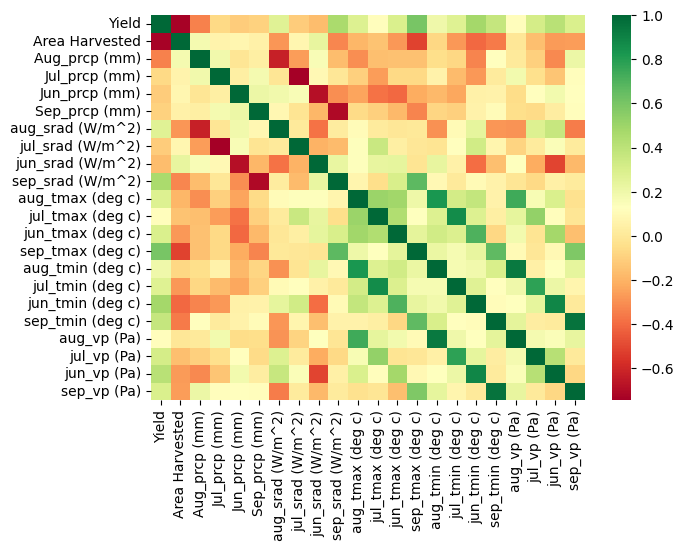

In [5]:
correlation = filtered_dataset.corr()
_, ax = plt.subplots(figsize = (7,5))
_ = sns.heatmap(correlation, ax = ax, cmap = 'RdYlGn', annot = False, fmt = '.1f', annot_kws={"size": 4})

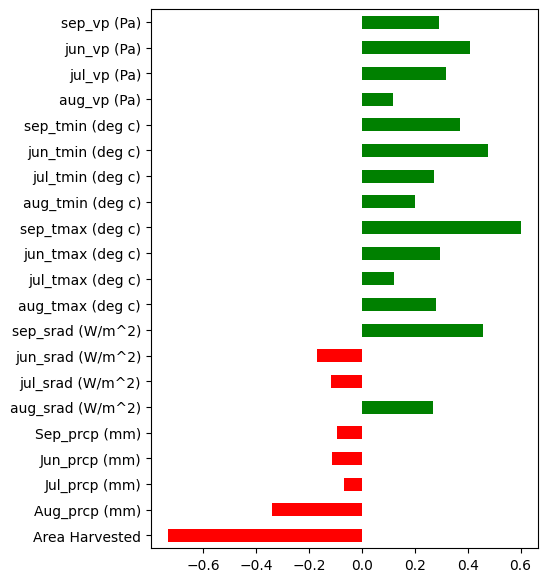

In [6]:
# Correlations
df_corr1 = correlation['Yield'][1:]
list1 = ['green' if x > 0 else 'red' for x in df_corr1]
_ = df_corr1.plot(kind = 'barh', figsize = (5,7), color = list1)

In [7]:
# data = dataset.drop(['Area Harvested'], axis=1)
data = dataset.copy()
data.set_index('date', inplace=True)
data

Yield  Area Harvested  Aug_prcp (mm)  Jul_prcp (mm)  \
date                                                              
1980-12-31  23252           46390        82.6500       171.1225   
1981-12-31  23729           47356        95.4500        99.4425   
1982-12-31  22526           31166        85.6100        40.2000   
1983-12-31  23689           47159       112.7850       145.5375   
1984-12-31  21995           40645        89.8275        63.4925   
1985-12-31  24233           39893       137.6650        76.4275   
1986-12-31  21572           31298        89.1100        92.7700   
1987-12-31  20781           29540       119.9275        37.8700   
1988-12-31  20024           29136        85.7525       172.4800   
1989-12-31  24697           30600        46.1375        63.0325   
1990-12-31  21490           29342       132.5500        73.6575   
1991-12-31  25912           30374        61.8225       123.7300   
1992-12-31  24629           26651       127.2775       210.6150   
1993-12-31  24620           31469        37.6500        33.4675   
1994-12-31  26894           26080        79.3875       106.2275   
1995-12-31  27598           26893        76.3400        50.7000   
1996-12-31  27295           25701        43.9800       137.2375   
1997-12-31  27111           28108        72.3900       107.6975   
1998-12-31  26451           27666        40.7750       110.6900   
1999-12-31  27790           25266        72.6675        36.6975   
2000-12-31  22273           23800        90.3450       147.4025   
2001-12-31  24703           23724        51.5475        17.3675   
2002-12-31  28803           18939        27.9150        49.6850   
2003-12-31  28972           15994        78.0400        93.1475   
2004-12-31  27025           15700        73.4875        99.8750   
2005-12-31  26875           16000        91.1375        93.5950   
2006-12-31  27146           15909       106.1200       148.7950   
2007-12-31  26667           16500        81.2100        48.8775   
2008-12-31  27224           14412        98.6200       130.3725   
2009-12-31  27504           13563       142.3000       104.6800   
2010-12-31  27433           12723        58.7700       112.0425   
2011-12-31  27515           11914       116.6475        60.7200   
2012-12-31  27596           11133        85.8375        52.7975   
2013-12-31  27678           10341        33.8900       113.4850   
2014-12-31  28205            9836        42.5575       129.7075   
2015-12-31  28710            9587        65.0825        52.2225   
2016-12-31  28185            9921        72.2275       107.0425   
2017-12-31  28363            9782        55.1150        32.9900   
2018-12-31  28416            9763       103.6750        74.9300   
2019-12-31  28321            9822        81.5375       140.1425   
2020-12-31  28367            9789        87.1125        98.2275   
2021-12-31  28368            9791        86.8600       154.4400   

            Jun_prcp (mm)  Sep_prcp (mm)  aug_srad (W/m^2)  jul_srad (W/m^2)  \
date                                                                           
1980-12-31      97.833621     115.510714        351.994677        360.596048   
1981-12-31     136.272321     155.394828        333.959032        382.391129   
1982-12-31     141.897321     121.150862        362.746210        403.382339   
1983-12-31      65.292857      57.318103        352.762177        361.725726   
1984-12-31     122.322414     122.657143        344.606129        395.069758   
1985-12-31      89.038393      72.561207        341.573548        380.927339   
1986-12-31      98.488393     145.184483        374.865323        369.249677   
1987-12-31      75.500893      70.189655        338.485323        394.473952   
1988-12-31       6.069828      99.875893        341.538145        363.779597   
1989-12-31      90.964286     114.809483        373.091371        402.676532   
1990-12-31      67.625893     122.782759        343.636532        383.334758   
1991-12-31      35.7000

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_Y = MinMaxScaler(feature_range=(0,1))

backup_data = data.copy()

new_data = data.copy()
print(data.shape)

scaled_data = scaler.fit_transform(data)
y_data = np.array(data['Yield']).reshape(-1,1)
print("Y_data shape:",y_data.shape)
scaled_Y = scaler_Y.fit_transform(y_data)
print(scaled_data[0])

(42, 22)
Y_data shape: (42, 1)
[0.36075101 0.97442347 0.47851554 0.79563772 0.45344409 0.39066297
 0.35205212 0.39025107 0.61360867 0.66042394 0.61095266 0.44057186
 0.11330377 0.41239219 0.90846372 0.41595281 0.         0.47290633
 0.88795328 0.61405869 0.14273304 0.4508109 ]


In [10]:
# Step 3: Create a sequence of data by shifting the data by one time step.
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        print(i+1,"th iteration")
        print("X:",data[i:(i + n_steps),:1])
        print('Y:',data[i + n_steps,:1])
        print()
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

time_steps = 5 # Define the number of time steps in the sequence
sequence_data = scaled_data
X, y = create_sequences(scaled_data, time_steps)

# def create_sequences(data, timesteps):
#     X_train = []
#     Y_train = []

#     timesteps = timesteps
#     n_future  = 1
#     train = data

#     for i in range(timesteps,len(train)-n_future +1):
#         X_train.append(train[i-timesteps:i, 0:train.shape[1]])
#         Y_train.append(train[i + n_future - 1:i + n_future,0])

#     X = np.array(X_train.copy())
#     y = np.array(Y_train.copy())
    
#     return X,y

print(X.shape)
print(y.shape)

1 th iteration
X: [[0.36075101]
 [0.41405901]
 [0.27961556]
 [0.40958873]
 [0.22027269]]
Y: [0.47038444]

2 th iteration
X: [[0.41405901]
 [0.27961556]
 [0.40958873]
 [0.22027269]
 [0.47038444]]
Y: [0.17299955]

3 th iteration
X: [[0.27961556]
 [0.40958873]
 [0.22027269]
 [0.47038444]
 [0.17299955]]
Y: [0.08459991]

4 th iteration
X: [[0.40958873]
 [0.22027269]
 [0.47038444]
 [0.17299955]
 [0.08459991]]
Y: [0.]

5 th iteration
X: [[0.22027269]
 [0.47038444]
 [0.17299955]
 [0.08459991]
 [0.        ]]
Y: [0.52223961]

6 th iteration
X: [[0.47038444]
 [0.17299955]
 [0.08459991]
 [0.        ]
 [0.52223961]]
Y: [0.16383549]

7 th iteration
X: [[0.17299955]
 [0.08459991]
 [0.        ]
 [0.52223961]
 [0.16383549]]
Y: [0.65802414]

8 th iteration
X: [[0.08459991]
 [0.        ]
 [0.52223961]
 [0.16383549]
 [0.65802414]]
Y: [0.51464014]

9 th iteration
X: [[0.        ]
 [0.52223961]
 [0.16383549]
 [0.65802414]
 [0.51464014]]
Y: [0.51363433]

10 th iteration
X: [[0.52223961]
 [0.16383549]
 [0.658

In [11]:
y[0]

array([0.47038444])

In [12]:
scaled_data[5,0]

0.4703844434510507

## Model LSTM/

In [13]:
import keras
import keras.backend as K

def r2_Keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.callbacks import *
from keras.layers import *
from keras.models import *

In [15]:
from itertools import product

# best_score = float('inf')
best_score = -9999
# best_hyperparameters = {}

# Step 3: Create a sequence of data by shifting the data by one time step.
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

def create_model_lstm(x, y, unitsconv, unitslstm, unitsdense , activate, optime, lr, loss, batch, epoch):
    
    # Model 8
    model2 = Sequential()
    model2.add(LSTM(unitsconv, activation=activate, input_shape=x.shape[1:], return_sequences=True))
    model2.add(GRU(unitslstm, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    print("\n\n")
    model2.summary()
    print("\n")    
    def r2_Keras(y_true, y_pred):
        SS_res =  K.sum(K.square( y_true-y_pred ))
        SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
        return ( 1 - SS_res/(SS_tot + K.epsilon()) )
    
    model2.compile(optimizer = optime(lr), loss=loss, metrics=[r2_Keras, 'mape'])    
    
    batch = int(batch)
    epoch = int(epoch)
    callback = ModelCheckpoint(filepath='Models/checkpoint/Model9_checkpoint.hdf5',
                              monitor='r2_Keras', mode='max', save_best_only=True, save_weights_only=True,
                              verbose=False)
    
    history = model2.fit(x, y,
                       batch_size = batch,
                       epochs = epoch,
                       verbose = 0,
                        callbacks=[callback],
                       shuffle = False)
    
    return model2, history

# Define hyperparameter search space
# models = [model1(), model2(), model3()]
timesteps = [5] #TimeSteps for Data
unitsconv_list = [32, 64, 128]
unitslstm_list = [32, 64, 128] # Number of LSTM Units
unitsdense_list = [16, 32, 64,] # Number of Dense units
activate_list = ['relu', 'selu'] # Activation Function
batch_size_list = [5, 8, 16] # Batch Size
learning_rate_list = [0.005, 0.001, 0.0005, 0.0001] # Learning Rate
optimizer_list = [keras.optimizers.Adamax, keras.optimizers.Adam] # Optimizer 
loss_list = ['mse'] # Loss Function
epoch_list = [80, 100]

Full_list = product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list)
print("Iterations :",len(list(Full_list)))
X_train, X_test, y_train, y_test = 0,0,0,0

# Iterate through all combinations of hyperparameters
for steps, convi, i, j, k, l, m, n, o, p in product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list):
    X, y = create_sequences(scaled_data, steps)
    X_train = X[:-9]
    y_train = y[:-9]
    X_test = X[-9:]
    y_test = y[-9:]
    
    print(steps, convi, i, j, k, l, m, n, o, p)
    model3, history = create_model_lstm(x=X_train, y=y_train, unitsconv=convi, unitslstm=i, unitsdense=j, activate=k, batch=l, lr=m, optime=n, loss=o, epoch=p)    
    
    
    
    model3.load_weights("Models/checkpoint/Model9_checkpoint.hdf5")
    y_pred1 = model3.predict(X_test)
    y_pred2 = scaler_Y.inverse_transform(y_pred1.reshape(-1, 1))
    y_true1 = y_test
    y_true2 = scaler_Y.inverse_transform(y_true1.reshape(-1, 1))
    score = r2_score(y_pred=y_pred2, y_true=y_true2)
    print("Fit Complete for:", steps, convi, i, j, k, l, m, n, o, p)
    print("\n\nCurrent Score:", score)
    
    # Update best hyperparameters if the current score is better
    if score > best_score:
        best_score = score
        best_hyperparameters = {"TimeSteps":steps, "unitsconv":convi, 'unitslstm': i, 'unitsdense': j, 'activate': k, 'batch': l, 'Optimizer': n, 'learning_rate': m, 'lossFunction': o, 'Epochs':p}
        print("\n\nNew Best Score:", score, "Hyperparameters:", (steps, convi, i, j, k, l, m, n, o, p))
        print("\nMAPE Score:",mean_absolute_percentage_error(y_pred=y_pred2, y_true=y_true2))
        model3.save('Models/Model9.hdf5')
        model3.save_weights("Models/Model9_weights.hdf5")

print("\n\nBest Hyperparameters:", best_hyperparameters)
print("Best Score:", best_score)


Iterations : 2592
5 32 32 16 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             7040      
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
__________________

                                                                 
 gru_5 (GRU)                 (None, 32)                6336      
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 32 32 16 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -2.4094764663977397


New Best Score: -2.4094764663977397 Hyperparameters: (5, 32, 32, 16, 'relu', 5

                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 32 32 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -2.8618005566612017
5 32 32 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_11 (GRU)                (None, 32)                6336      
                                               

                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 32 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -10.789758922605767
5 32 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_17 (GRU)                (None, 32)                6336      
                                                                 
 flatten_17 (Flatten)        (None, 32)                0         
                                         

Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 32 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -19.952131230166245
5 32 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_23 (GRU)                (None, 32)                6336      
                                                                 
 flatten_23 (Flatten)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 16)          



1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 32 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -42.54747846331829
5 32 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_29 (GRU)                (None, 32)                6336      
                                                                 
 flatten_29 (Flatten)        (None, 32)                0         
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 1)      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_35 (GRU)                (None, 32)                6336      
                                                                 
 flatten_35 (Flatten)        (None, 32)                0         
                                                                 
 dense_70 (Dense)            (None, 16)                528       
                                                                 
 dense_71 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 186ms/step
Fit Complete for:

 lstm_41 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_41 (GRU)                (None, 32)                6336      
                                                                 
 flatten_41 (Flatten)        (None, 32)                0         
                                                                 
 dense_82 (Dense)            (None, 16)                528       
                                                                 
 dense_83 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 32 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -40.4047988953611
5 32 32 16 rel

                                                                 
 gru_47 (GRU)                (None, 32)                6336      
                                                                 
 flatten_47 (Flatten)        (None, 32)                0         
                                                                 
 dense_94 (Dense)            (None, 16)                528       
                                                                 
 dense_95 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 32 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -82.4166945764742
5 32 32 16 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Mo

                                                                 
 flatten_53 (Flatten)        (None, 32)                0         
                                                                 
 dense_106 (Dense)           (None, 16)                528       
                                                                 
 dense_107 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 32 32 16 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -4.740133017994451
5 32 32 16 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape     

                                                                 
 dense_118 (Dense)           (None, 16)                528       
                                                                 
 dense_119 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 32 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -63.49366141151155
5 32 32 16 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 5, 32)             7040      
                                            

 flatten_65 (Flatten)        (None, 32)                0         
                                                                 
 dense_130 (Dense)           (None, 16)                528       
                                                                 
 dense_131 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 32 32 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -1.783884120226316
5 32 32 16 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 5, 32)    

 dense_142 (Dense)           (None, 16)                528       
                                                                 
 dense_143 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -19.377312486366773
5 32 32 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_72 (GRU)                (None, 32)     

 dense_155 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 32 32 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -31.523566382455265
5 32 32 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_78 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_78 (GRU)                (None, 32)                6336      
                                                                 
 flatten_78 (Flatten)        (None, 32)    

Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 32 32 16 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -18.448278159716143
5 32 32 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_84 (GRU)                (None, 32)                6336      
                                                                 
 flatten_84 (Flatten)        (None, 32)                0         
                                                                 
 dense_168 (Dense)           (None, 16)    

Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 32 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -22.873584071207976
5 32 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_90 (GRU)                (None, 32)                6336      
                                                                 
 flatten_90 (Flatten)        (None, 32)                0         
                                                                 
 dense_180 (Dense)           (None, 16)                528    



1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 32 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -8.20390202515254
5 32 32 32 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, 5, 32)             7040      
                                                                 
 gru_96 (GRU)                (None, 32)                6336      
                                                                 
 flatten_96 (Flatten)        (None, 32)                0         
                                                                 
 dense_192 (Dense)           (None, 32)                1056      
                                                                 
 dense_193 (Dense)           (None, 1)           

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_102 (GRU)               (None, 32)                6336      
                                                                 
 flatten_102 (Flatten)       (None, 32)                0         
                                                                 
 dense_204 (Dense)           (None, 32)                1056      
                                                                 
 dense_205 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for:

 lstm_108 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_108 (GRU)               (None, 32)                6336      
                                                                 
 flatten_108 (Flatten)       (None, 32)                0         
                                                                 
 dense_216 (Dense)           (None, 32)                1056      
                                                                 
 dense_217 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 32 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -32.53528665580652
5 32 32 32 relu

                                                                 
 gru_114 (GRU)               (None, 32)                6336      
                                                                 
 flatten_114 (Flatten)       (None, 32)                0         
                                                                 
 dense_228 (Dense)           (None, 32)                1056      
                                                                 
 dense_229 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -12.921304270762539
5 32 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model:

                                                                 
 flatten_120 (Flatten)       (None, 32)                0         
                                                                 
 dense_240 (Dense)           (None, 32)                1056      
                                                                 
 dense_241 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 32 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -28.50075550883164
5 32 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Sha

                                                                 
 dense_252 (Dense)           (None, 32)                1056      
                                                                 
 dense_253 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -36.232703000218
5 32 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_127 (LSTM)             (None, 5, 32)             7040      
                                                 

                                                                 
 dense_265 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 32 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -8.041438061191002
5 32 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_133 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_133 (GRU)               (None, 32)                6336      
                                       

 dense_277 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -3.026528274252792
5 32 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_139 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_139 (GRU)               (None, 32)                6336      
                                                                 
 flatten_139 (Flatten)       (None, 32)      

Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 32 32 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -22.522822126560808
5 32 32 32 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_145 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_145 (GRU)               (None, 32)                6336      
                                                                 
 flatten_145 (Flatten)       (None, 32)                0         
                                                                 
 dense_290 (Dense)           (None, 32) 

Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 32 32 32 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.56896679053183
5 32 32 32 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_151"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_151 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_151 (GRU)               (None, 32)                6336      
                                                                 
 flatten_151 (Flatten)       (None, 32)                0         
                                                                 
 dense_302 (Dense)           (None, 32)                1056      
     



1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 32 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -44.237169729392804
5 32 32 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_157 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_157 (GRU)               (None, 32)                6336      
                                                                 
 flatten_157 (Flatten)       (None, 32)                0         
                                                                 
 dense_314 (Dense)           (None, 32)                1056      
                                                                 
 dense_315 (Dense)           (None, 1)    

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_163 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_163 (GRU)               (None, 32)                6336      
                                                                 
 flatten_163 (Flatten)       (None, 32)                0         
                                                                 
 dense_326 (Dense)           (None, 32)                1056      
                                                                 
 dense_327 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for:

 lstm_169 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_169 (GRU)               (None, 32)                6336      
                                                                 
 flatten_169 (Flatten)       (None, 32)                0         
                                                                 
 dense_338 (Dense)           (None, 32)                1056      
                                                                 
 dense_339 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 32 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -7.117328236035929
5 32 32 32 sel

                                                                 
 gru_175 (GRU)               (None, 32)                6336      
                                                                 
 flatten_175 (Flatten)       (None, 32)                0         
                                                                 
 dense_350 (Dense)           (None, 32)                1056      
                                                                 
 dense_351 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 32 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -4.6449645239112485
5 32 32 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80





                                                                 
 flatten_181 (Flatten)       (None, 32)                0         
                                                                 
 dense_362 (Dense)           (None, 32)                1056      
                                                                 
 dense_363 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -0.6823894492665146
5 32 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_182"
_________________________________________________________________
 Layer (type)                Output Shape 

                                                                 
 dense_374 (Dense)           (None, 32)                1056      
                                                                 
 dense_375 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 32 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -0.5472965813215496
5 32 32 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_188"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_188 (LSTM)             (None, 5, 32)             7040      
                                        

 dense_386 (Dense)           (None, 64)                2112      
                                                                 
 dense_387 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 32 32 64 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -25.040991014546712
5 32 32 64 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_194"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_194 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_194 (GRU)               (None, 32)     

 dense_399 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 32 32 64 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -29.957658481066236
5 32 32 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_200 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_200 (GRU)               (None, 32)                6336      
                                                                 
 flatten_200 (Flatten)       (None, 32)    

Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 215ms/step
Fit Complete for: 5 32 32 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -61.82302071173614
5 32 32 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_206"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_206 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_206 (GRU)               (None, 32)                6336      
                                                                 
 flatten_206 (Flatten)       (None, 32)                0         
                                                                 
 dense_412 (Dense)           (None, 64)    

Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 184ms/step
Fit Complete for: 5 32 32 64 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -34.132870419091866
5 32 32 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_212 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_212 (GRU)               (None, 32)                6336      
                                                                 
 flatten_212 (Flatten)       (None, 32)                0         
                                                                 
 dense_424 (Dense)           (None, 64)                2112      



1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 32 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -19.373584746796045
5 32 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_218"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_218 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_218 (GRU)               (None, 32)                6336      
                                                                 
 flatten_218 (Flatten)       (None, 32)                0         
                                                                 
 dense_436 (Dense)           (None, 64)                2112      
                                                                 
 dense_437 (Dense)           (None, 1)        

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_224 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_224 (GRU)               (None, 32)                6336      
                                                                 
 flatten_224 (Flatten)       (None, 32)                0         
                                                                 
 dense_448 (Dense)           (None, 64)                2112      
                                                                 
 dense_449 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 191ms/step
Fit Complete for:

 lstm_230 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_230 (GRU)               (None, 32)                6336      
                                                                 
 flatten_230 (Flatten)       (None, 32)                0         
                                                                 
 dense_460 (Dense)           (None, 64)                2112      
                                                                 
 dense_461 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.60968756055345
5 32 32 64 relu 16 0

                                                                 
 gru_236 (GRU)               (None, 32)                6336      
                                                                 
 flatten_236 (Flatten)       (None, 32)                0         
                                                                 
 dense_472 (Dense)           (None, 64)                2112      
                                                                 
 dense_473 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -160.60841660165678
5 32 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 1

                                                                 
 flatten_242 (Flatten)       (None, 32)                0         
                                                                 
 dense_484 (Dense)           (None, 64)                2112      
                                                                 
 dense_485 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 184ms/step
Fit Complete for: 5 32 32 64 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -14.32391965528897
5 32 32 64 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_243"
_________________________________________________________________
 Layer (type)                Output Shape        

                                                                 
 dense_496 (Dense)           (None, 64)                2112      
                                                                 
 dense_497 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 32 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -5.846985214484881
5 32 32 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_249 (LSTM)             (None, 5, 32)             7040      
                                       

                                                                 
 dense_509 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 32 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -8.784911889441261
5 32 32 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_255"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_255 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_255 (GRU)               (None, 32)                6336      
                                               

                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 32 32 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -5.592234428328991
5 32 32 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_261"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_261 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_261 (GRU)               (None, 32)                6336      
                                                                 
 flatten_261 (Flatten)       (None, 32)                0         
                                         

Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 32 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -0.9228207069192074
5 32 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_267"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_267 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_267 (GRU)               (None, 32)                6336      
                                                                 
 flatten_267 (Flatten)       (None, 32)                0         
                                                                 
 dense_534 (Dense)           (None, 64)       



1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 32 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -11.484596641939197
5 32 32 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_273"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_273 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_273 (GRU)               (None, 32)                6336      
                                                                 
 flatten_273 (Flatten)       (None, 32)                0         
                                                                 
 dense_546 (Dense)           (None, 64)                2112      
                                                                 
 dense_547 (Dense)           (None, 1)    

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_279 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_279 (GRU)               (None, 32)                6336      
                                                                 
 flatten_279 (Flatten)       (None, 32)                0         
                                                                 
 dense_558 (Dense)           (None, 64)                2112      
                                                                 
 dense_559 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 190ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_285 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_285 (GRU)               (None, 32)                6336      
                                                                 
 flatten_285 (Flatten)       (None, 32)                0         
                                                                 
 dense_570 (Dense)           (None, 64)                2112      
                                                                 
 dense_571 (Dense)           (None, 1)                 65        
                                                                 
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 32 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.

 lstm_291 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_291 (GRU)               (None, 64)                18816     
                                                                 
 flatten_291 (Flatten)       (None, 64)                0         
                                                                 
 dense_582 (Dense)           (None, 16)                1040      
                                                                 
 dense_583 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 32 64 16 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -10.950345108400835
5 32 64 16 relu 5 

 gru_297 (GRU)               (None, 64)                18816     
                                                                 
 flatten_297 (Flatten)       (None, 64)                0         
                                                                 
 dense_594 (Dense)           (None, 16)                1040      
                                                                 
 dense_595 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 219ms/step
Fit Complete for: 5 32 64 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -27.049714065401513
5 32 64 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_298"
__________________________________________

 flatten_303 (Flatten)       (None, 64)                0         
                                                                 
 dense_606 (Dense)           (None, 16)                1040      
                                                                 
 dense_607 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 32 64 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -16.696024480812525
5 32 64 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_304"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_304 (LSTM)             (None, 5, 32) 

 dense_618 (Dense)           (None, 16)                1040      
                                                                 
 dense_619 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 64 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -5.798819348367688
5 32 64 16 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_310"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_310 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_310 (GRU)               (None, 64)      

 dense_631 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 32 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -2.1568999675652365
5 32 64 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_316"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_316 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_316 (GRU)               (None, 64)                18816     
                                                                 
 flatten_316 (Flatten)       (None, 64)   

Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 190ms/step
Fit Complete for: 5 32 64 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -11.500220908837198
5 32 64 16 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_322"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_322 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_322 (GRU)               (None, 64)                18816     
                                                                 
 flatten_322 (Flatten)       (None, 64)                0         
                                                                 
 dense_644 (Dense)           (None, 16)   

Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 32 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -1.3853300657074037
5 32 64 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_328"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_328 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_328 (GRU)               (None, 64)                18816     
                                                                 
 flatten_328 (Flatten)       (None, 64)                0         
                                                                 
 dense_656 (Dense)           (None, 16)                1040   



1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 32 64 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -43.16957206041626
5 32 64 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_334"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_334 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_334 (GRU)               (None, 64)                18816     
                                                                 
 flatten_334 (Flatten)       (None, 64)                0         
                                                                 
 dense_668 (Dense)           (None, 16)                1040      
                                                                 
 dense_669 (Dense)           (None, 1)       

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_340 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_340 (GRU)               (None, 64)                18816     
                                                                 
 flatten_340 (Flatten)       (None, 64)                0         
                                                                 
 dense_680 (Dense)           (None, 16)                1040      
                                                                 
 dense_681 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 197ms/step
Fit Complete for:

 lstm_346 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_346 (GRU)               (None, 64)                18816     
                                                                 
 flatten_346 (Flatten)       (None, 64)                0         
                                                                 
 dense_692 (Dense)           (None, 16)                1040      
                                                                 
 dense_693 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 32 64 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -57.44901499239259
5 32 64 16 selu 5 0

                                                                 
 gru_352 (GRU)               (None, 64)                18816     
                                                                 
 flatten_352 (Flatten)       (None, 64)                0         
                                                                 
 dense_704 (Dense)           (None, 16)                1040      
                                                                 
 dense_705 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 64 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -5.891967500459663
5 32 64 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100




                                                                 
 flatten_358 (Flatten)       (None, 64)                0         
                                                                 
 dense_716 (Dense)           (None, 16)                1040      
                                                                 
 dense_717 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 32 64 16 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -6.397892833232587
5 32 64 16 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_359"
_________________________________________________________________
 Layer (type)                Output Shape        

                                                                 
 dense_728 (Dense)           (None, 16)                1040      
                                                                 
 dense_729 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 32 64 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -3.1807736189121183
5 32 64 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_365"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_365 (LSTM)             (None, 5, 32)             7040      
                                      

                                                                 
 dense_741 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 64 16 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -8.934836898924793
5 32 64 16 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_371"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_371 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_371 (GRU)               (None, 64)                18816     
                                               

 dense_752 (Dense)           (None, 16)                1040      
                                                                 
 dense_753 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 64 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -18.007146490230877
5 32 64 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_377"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_377 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_377 (GRU)               (None, 

                                                                 
 dense_765 (Dense)           (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 194ms/step
Fit Complete for: 5 32 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -15.998419419090347
5 32 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_383"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_383 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_383 (GRU)               (None, 64)                18816     
                                            

                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 64 32 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -3.7830862676999564
5 32 64 32 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_389"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_389 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_389 (GRU)               (None, 64)                18816     
                                                                 
 flatten_389 (Flatten)       (None, 64)                0         
                                        

Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 32 64 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -36.2115119307783
5 32 64 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_395"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_395 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_395 (GRU)               (None, 64)                18816     
                                                                 
 flatten_395 (Flatten)       (None, 64)                0         
                                                                 
 dense_790 (Dense)           (None, 32)         



1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 64 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -9.765161676992877
5 32 64 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_401"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_401 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_401 (GRU)               (None, 64)                18816     
                                                                 
 flatten_401 (Flatten)       (None, 64)                0         
                                                                 
 dense_802 (Dense)           (None, 32)                2080      
                                                                 
 dense_803 (Dense)           (None, 1)       

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_407 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_407 (GRU)               (None, 64)                18816     
                                                                 
 flatten_407 (Flatten)       (None, 64)                0         
                                                                 
 dense_814 (Dense)           (None, 32)                2080      
                                                                 
 dense_815 (Dense)           (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for:

 lstm_413 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_413 (GRU)               (None, 64)                18816     
                                                                 
 flatten_413 (Flatten)       (None, 64)                0         
                                                                 
 dense_826 (Dense)           (None, 32)                2080      
                                                                 
 dense_827 (Dense)           (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 64 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -25.993398252442073
5 32 64 32 re

                                                                 
 gru_419 (GRU)               (None, 64)                18816     
                                                                 
 flatten_419 (Flatten)       (None, 64)                0         
                                                                 
 dense_838 (Dense)           (None, 32)                2080      
                                                                 
 dense_839 (Dense)           (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 64 32 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -13.329578717985894
5 32 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80





 gru_425 (GRU)               (None, 64)                18816     
                                                                 
 flatten_425 (Flatten)       (None, 64)                0         
                                                                 
 dense_850 (Dense)           (None, 32)                2080      
                                                                 
 dense_851 (Dense)           (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 204ms/step
Fit Complete for: 5 32 64 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -9.493647436136136
5 32 64 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_426"
_________________________________________

                                                                 
 flatten_431 (Flatten)       (None, 64)                0         
                                                                 
 dense_862 (Dense)           (None, 32)                2080      
                                                                 
 dense_863 (Dense)           (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 32 64 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -44.71886103836499
5 32 64 32 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_432"
_________________________________________________________________
 Layer (type)                Output Shape  

                                                                 
 dense_874 (Dense)           (None, 32)                2080      
                                                                 
 dense_875 (Dense)           (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 32 64 32 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -5.033066862672334
5 32 64 32 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_438"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_438 (LSTM)             (None, 5, 32)             7040      
                                             

                                                                 
 dense_887 (Dense)           (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 64 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -3.217740494833988
5 32 64 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_444"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_444 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_444 (GRU)               (None, 64)                18816     
                                           

                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 237ms/step
Fit Complete for: 5 32 64 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -41.191719750236565
5 32 64 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_450"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_450 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_450 (GRU)               (None, 64)                18816     
                                                                 
 flatten_450 (Flatten)       (None, 64)                0         
                                            

Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 64 32 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -24.37906162132636
5 32 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_456"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_456 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_456 (GRU)               (None, 64)                18816     
                                                                 
 flatten_456 (Flatten)       (None, 64)                0         
                                                                 
 dense_912 (Dense)           (None, 32)     

_________________________________________________________________


1/1 [==============================] - 0s 188ms/step
Fit Complete for: 5 32 64 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -3.4624565218309495
5 32 64 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_462"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_462 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_462 (GRU)               (None, 64)                18816     
                                                                 
 flatten_462 (Flatten)       (None, 64)                0         
                                                                 
 dense_924 (Dense)           (None, 32)                2080      
                                              

1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 64 32 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -11.32205629473623
5 32 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_468"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_468 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_468 (GRU)               (None, 64)                18816     
                                                                 
 flatten_468 (Flatten)       (None, 64)                0         
                                                                 
 dense_936 (Dense)           (None, 32)                2080      
                                                                 
 dense_937 (Dense)           (None, 1)           

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_474 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_474 (GRU)               (None, 64)                18816     
                                                                 
 flatten_474 (Flatten)       (None, 64)                0         
                                                                 
 dense_948 (Dense)           (None, 32)                2080      
                                                                 
 dense_949 (Dense)           (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 221ms/step
Fit Complete for:

 lstm_480 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_480 (GRU)               (None, 64)                18816     
                                                                 
 flatten_480 (Flatten)       (None, 64)                0         
                                                                 
 dense_960 (Dense)           (None, 64)                4160      
                                                                 
 dense_961 (Dense)           (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 32 64 64 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -41.35090105491071
5 32 64 64 relu 

                                                                 
 gru_486 (GRU)               (None, 64)                18816     
                                                                 
 flatten_486 (Flatten)       (None, 64)                0         
                                                                 
 dense_972 (Dense)           (None, 64)                4160      
                                                                 
 dense_973 (Dense)           (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 32 64 64 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -3.8930294149427382
5 32 64 64 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model:

                                                                 
 flatten_492 (Flatten)       (None, 64)                0         
                                                                 
 dense_984 (Dense)           (None, 64)                4160      
                                                                 
 dense_985 (Dense)           (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 64 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -61.41976254360154
5 32 64 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_493"
_________________________________________________________________
 Layer (type)                Output Sha

                                                                 
 dense_996 (Dense)           (None, 64)                4160      
                                                                 
 dense_997 (Dense)           (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 64 64 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -10.508212290821575
5 32 64 64 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_499"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_499 (LSTM)             (None, 5, 32)             7040      
                                                

                                                                 
 dense_1009 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 226ms/step
Fit Complete for: 5 32 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -3.870050219278533
5 32 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_505"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_505 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_505 (GRU)               (None, 64)                18816     
                                       

                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 32 64 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -34.226261393635085
5 32 64 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_511"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_511 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_511 (GRU)               (None, 64)                18816     
                                                                 
 flatten_511 (Flatten)       (None, 64)                0         
                                              

Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 32 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -15.695382614506517
5 32 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_517"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_517 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_517 (GRU)               (None, 64)                18816     
                                                                 
 flatten_517 (Flatten)       (None, 64)                0         
                                                                 
 dense_1034 (Dense)          (None, 64

_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 64 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -10.270584503953446
5 32 64 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_523"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_523 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_523 (GRU)               (None, 64)                18816     
                                                                 
 flatten_523 (Flatten)       (None, 64)                0         
                                                                 
 dense_1046 (Dense)          (None, 64)                4160      
                                                



1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 64 64 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -56.251581859682865
5 32 64 64 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_529"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_529 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_529 (GRU)               (None, 64)                18816     
                                                                 
 flatten_529 (Flatten)       (None, 64)                0         
                                                                 
 dense_1058 (Dense)          (None, 64)                4160      
                                                                 
 dense_1059 (Dense)          (None, 1)      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_535 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_535 (GRU)               (None, 64)                18816     
                                                                 
 flatten_535 (Flatten)       (None, 64)                0         
                                                                 
 dense_1070 (Dense)          (None, 64)                4160      
                                                                 
 dense_1071 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 182ms/step
Fit Complete for:

 lstm_541 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_541 (GRU)               (None, 64)                18816     
                                                                 
 flatten_541 (Flatten)       (None, 64)                0         
                                                                 
 dense_1082 (Dense)          (None, 64)                4160      
                                                                 
 dense_1083 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 201ms/step
Fit Complete for: 5 32 64 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -7.823171830084531
5 32 64 64 sel

                                                                 
 gru_547 (GRU)               (None, 64)                18816     
                                                                 
 flatten_547 (Flatten)       (None, 64)                0         
                                                                 
 dense_1094 (Dense)          (None, 64)                4160      
                                                                 
 dense_1095 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 32 64 64 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -7.872261007779395
5 32 64 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Mod

                                                                 
 flatten_553 (Flatten)       (None, 64)                0         
                                                                 
 dense_1106 (Dense)          (None, 64)                4160      
                                                                 
 dense_1107 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -5.233938950088075
5 32 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_554"
_________________________________________________________________
 Layer (type)                Output Shape  

                                                                 
 dense_1118 (Dense)          (None, 64)                4160      
                                                                 
 dense_1119 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 200ms/step
Fit Complete for: 5 32 64 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -2.3411663098955238
5 32 64 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_560"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_560 (LSTM)             (None, 5, 32)             7040      
                                          

 flatten_565 (Flatten)       (None, 64)                0         
                                                                 
 dense_1130 (Dense)          (None, 64)                4160      
                                                                 
 dense_1131 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 32 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -11.566326025109337
5 32 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_566"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_566 (LSTM)             (None, 5, 32)

 dense_1142 (Dense)          (None, 64)                4160      
                                                                 
 dense_1143 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 64 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -25.895720585261138
5 32 64 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_572"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_572 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_572 (GRU)               (None, 64) 

                                                                 
 dense_1155 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 128 16 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -8.15119938811743
5 32 128 16 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_578"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_578 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_578 (GRU)               (None, 128)               62208     
                                            

                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 128 16 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -11.422088441375665
5 32 128 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_584"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_584 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_584 (GRU)               (None, 128)               62208     
                                                                 
 flatten_584 (Flatten)       (None, 128)               0         
                                         

Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 191ms/step
Fit Complete for: 5 32 128 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -18.767416732020415
5 32 128 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_590"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_590 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_590 (GRU)               (None, 128)               62208     
                                                                 
 flatten_590 (Flatten)       (None, 128)               0         
                                                                 
 dense_1180 (Dense)          (None, 16) 

Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 32 128 16 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -13.916540928062364
5 32 128 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_596"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_596 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_596 (GRU)               (None, 128)               62208     
                                                                 
 flatten_596 (Flatten)       (None, 128)               0         
                                                                 
 dense_1192 (Dense)          (None, 16)                2064    



1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -3.1872935875460238
5 32 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_602"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_602 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_602 (GRU)               (None, 128)               62208     
                                                                 
 flatten_602 (Flatten)       (None, 128)               0         
                                                                 
 dense_1204 (Dense)          (None, 16)                2064      
                                                                 
 dense_1205 (Dense)          (None, 1)      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_608 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_608 (GRU)               (None, 128)               62208     
                                                                 
 flatten_608 (Flatten)       (None, 128)               0         
                                                                 
 dense_1216 (Dense)          (None, 16)                2064      
                                                                 
 dense_1217 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 205ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_614 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_614 (GRU)               (None, 128)               62208     
                                                                 
 flatten_614 (Flatten)       (None, 128)               0         
                                                                 
 dense_1228 (Dense)          (None, 16)                2064      
                                                                 
 dense_1229 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 32 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Ad

 lstm_620 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_620 (GRU)               (None, 128)               62208     
                                                                 
 flatten_620 (Flatten)       (None, 128)               0         
                                                                 
 dense_1240 (Dense)          (None, 16)                2064      
                                                                 
 dense_1241 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 32 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -225.7422860380704
5 32 128 16 r

 lstm_626 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_626 (GRU)               (None, 128)               62208     
                                                                 
 flatten_626 (Flatten)       (None, 128)               0         
                                                                 
 dense_1252 (Dense)          (None, 16)                2064      
                                                                 
 dense_1253 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 32 128 16 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -31.097404873480272
5 32 128 16 selu 5

 gru_632 (GRU)               (None, 128)               62208     
                                                                 
 flatten_632 (Flatten)       (None, 128)               0         
                                                                 
 dense_1264 (Dense)          (None, 16)                2064      
                                                                 
 dense_1265 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 32 128 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -19.20013162767525
5 32 128 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_633"
_____________________________________

                                                                 
 flatten_638 (Flatten)       (None, 128)               0         
                                                                 
 dense_1276 (Dense)          (None, 16)                2064      
                                                                 
 dense_1277 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 213ms/step
Fit Complete for: 5 32 128 16 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.971190777390039
5 32 128 16 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_639"
_________________________________________________________________
 Layer (type)                Output Shape    

                                                                 
 dense_1288 (Dense)          (None, 16)                2064      
                                                                 
 dense_1289 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 32 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -8.713270347192973
5 32 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_645"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_645 (LSTM)             (None, 5, 32)             7040      
                                       

 dense_1300 (Dense)          (None, 16)                2064      
                                                                 
 dense_1301 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 32 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -48.50791159639861
5 32 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_651"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_651 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_651 (GRU)               (None, 128)     

                                                                 
 dense_1313 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -2.7401552598811896
5 32 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_657"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_657 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_657 (GRU)               (None, 128)               62208     
                                    

 dense_1325 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 32 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -34.83328222156673
5 32 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_663"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_663 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_663 (GRU)               (None, 128)               62208     
                                                                 
 flatten_663 (Flatten)       (None, 128)     

                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 32 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -22.75342740077696
5 32 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_669"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_669 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_669 (GRU)               (None, 128)               62208     
                                                                 
 flatten_669 (Flatten)       (None, 128)               0         
                                   

Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 32 128 32 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -17.456733810415873
5 32 128 32 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_675"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_675 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_675 (GRU)               (None, 128)               62208     
                                                                 
 flatten_675 (Flatten)       (None, 128)               0         
                                                                 
 dense_1350 (Dense)          (None, 32)       

Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 128 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -11.156935045448138
5 32 128 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_681"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_681 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_681 (GRU)               (None, 128)               62208     
                                                                 
 flatten_681 (Flatten)       (None, 128)               0         
                                                                 
 dense_1362 (Dense)          (None, 32)                41



1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 32 128 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.870049595843101
5 32 128 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_687"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_687 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_687 (GRU)               (None, 128)               62208     
                                                                 
 flatten_687 (Flatten)       (None, 128)               0         
                                                                 
 dense_1374 (Dense)          (None, 32)                4128      
                                                                 
 dense_1375 (Dense)          (None, 1)           

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_693 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_693 (GRU)               (None, 128)               62208     
                                                                 
 flatten_693 (Flatten)       (None, 128)               0         
                                                                 
 dense_1386 (Dense)          (None, 32)                4128      
                                                                 
 dense_1387 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 158ms/step
Fit Complete for:

 lstm_699 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_699 (GRU)               (None, 128)               62208     
                                                                 
 flatten_699 (Flatten)       (None, 128)               0         
                                                                 
 dense_1398 (Dense)          (None, 32)                4128      
                                                                 
 dense_1399 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 32 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -2.797559136175303
5 32 128 32 relu 

 lstm_705 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_705 (GRU)               (None, 128)               62208     
                                                                 
 flatten_705 (Flatten)       (None, 128)               0         
                                                                 
 dense_1410 (Dense)          (None, 32)                4128      
                                                                 
 dense_1411 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -55.898534185896274
5 32 128 32 

                                                                 
 gru_711 (GRU)               (None, 128)               62208     
                                                                 
 flatten_711 (Flatten)       (None, 128)               0         
                                                                 
 dense_1422 (Dense)          (None, 32)                4128      
                                                                 
 dense_1423 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 32 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -15.20260863545873
5 32 128 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



 gru_717 (GRU)               (None, 128)               62208     
                                                                 
 flatten_717 (Flatten)       (None, 128)               0         
                                                                 
 dense_1434 (Dense)          (None, 32)                4128      
                                                                 
 dense_1435 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 32 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -150.04836490835936
5 32 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_718"
______________________________________

 flatten_723 (Flatten)       (None, 128)               0         
                                                                 
 dense_1446 (Dense)          (None, 32)                4128      
                                                                 
 dense_1447 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 211ms/step
Fit Complete for: 5 32 128 32 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -11.913652703706482
5 32 128 32 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_724"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_724 (LSTM)             (None, 5, 32)

                                                                 
 dense_1458 (Dense)          (None, 32)                4128      
                                                                 
 dense_1459 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 32 128 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -7.9223157765753225
5 32 128 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_730"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_730 (LSTM)             (None, 5, 32)             7040      
                                        

 dense_1470 (Dense)          (None, 32)                4128      
                                                                 
 dense_1471 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 128 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -42.90442618364769
5 32 128 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_736"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_736 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_736 (GRU)               (None, 128)  

 dense_1483 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -12.187591647379167
5 32 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_742"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_742 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_742 (GRU)               (None, 128)               62208     
                                                                 
 flatten_742 (Flatten)       (None, 128)  

Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -19.69610303210885
5 32 128 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_748"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_748 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_748 (GRU)               (None, 128)               62208     
                                                                 
 flatten_748 (Flatten)       (None, 128)               0         
                                                                 
 dense_1496 (Dense)          (None, 32)  

Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 32 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -2.5227743449441595
5 32 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_754"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_754 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_754 (GRU)               (None, 128)               62208     
                                                                 
 flatten_754 (Flatten)       (None, 128)               0         
                                                                 
 dense_1508 (Dense)          (None, 32) 

_________________________________________________________________


1/1 [==============================] - 0s 196ms/step
Fit Complete for: 5 32 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -3.5008126773466124
5 32 128 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_760"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_760 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_760 (GRU)               (None, 128)               62208     
                                                                 
 flatten_760 (Flatten)       (None, 128)               0         
                                                                 
 dense_1520 (Dense)          (None, 32)                4128      
                                           



1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 32 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -54.6713576537577
5 32 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_766"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_766 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_766 (GRU)               (None, 128)               62208     
                                                                 
 flatten_766 (Flatten)       (None, 128)               0         
                                                                 
 dense_1532 (Dense)          (None, 32)                4128      
                                                                 
 dense_1533 (Dense)          (None, 1)      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_772 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_772 (GRU)               (None, 128)               62208     
                                                                 
 flatten_772 (Flatten)       (None, 128)               0         
                                                                 
 dense_1544 (Dense)          (None, 64)                8256      
                                                                 
 dense_1545 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_778 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_778 (GRU)               (None, 128)               62208     
                                                                 
 flatten_778 (Flatten)       (None, 128)               0         
                                                                 
 dense_1556 (Dense)          (None, 64)                8256      
                                                                 
 dense_1557 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 32 128 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Ad

 lstm_784 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_784 (GRU)               (None, 128)               62208     
                                                                 
 flatten_784 (Flatten)       (None, 128)               0         
                                                                 
 dense_1568 (Dense)          (None, 64)                8256      
                                                                 
 dense_1569 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 32 128 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -19.473018335600493
5 32 128 64 re

                                                                 
 gru_790 (GRU)               (None, 128)               62208     
                                                                 
 flatten_790 (Flatten)       (None, 128)               0         
                                                                 
 dense_1580 (Dense)          (None, 64)                8256      
                                                                 
 dense_1581 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 212ms/step
Fit Complete for: 5 32 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -20.598069122179787
5 32 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Mode

 gru_796 (GRU)               (None, 128)               62208     
                                                                 
 flatten_796 (Flatten)       (None, 128)               0         
                                                                 
 dense_1592 (Dense)          (None, 64)                8256      
                                                                 
 dense_1593 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 32 128 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -34.68794842295789
5 32 128 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_797"
_____________________________________

                                                                 
 flatten_802 (Flatten)       (None, 128)               0         
                                                                 
 dense_1604 (Dense)          (None, 64)                8256      
                                                                 
 dense_1605 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 32 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -5.680548790282127
5 32 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_803"
_________________________________________________________________
 Layer (type)                Output Shape    

 flatten_808 (Flatten)       (None, 128)               0         
                                                                 
 dense_1616 (Dense)          (None, 64)                8256      
                                                                 
 dense_1617 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 32 128 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -7.400347873403268
5 32 128 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_809"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_809 (LSTM)             (None,

                                                                 
 dense_1628 (Dense)          (None, 64)                8256      
                                                                 
 dense_1629 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -64.64645161130564
5 32 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_815"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_815 (LSTM)             (None, 5, 32)             7040      
                                           

                                                                 
 dense_1641 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 32 128 64 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -37.098875674522574
5 32 128 64 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_821"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_821 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_821 (GRU)               (None, 128)               62208     
                                      

                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 32 128 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -1.0966815190442882
5 32 128 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_827"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_827 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_827 (GRU)               (None, 128)               62208     
                                                                 
 flatten_827 (Flatten)       (None, 128)               0         
                                            

Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 205ms/step
Fit Complete for: 5 32 128 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -13.46943245045481
5 32 128 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_833"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_833 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_833 (GRU)               (None, 128)               62208     
                                                                 
 flatten_833 (Flatten)       (None, 128)               0         
                                                                 
 dense_1666 (Dense)          (None, 64)

Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -24.81891651891002
5 32 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_839"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_839 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_839 (GRU)               (None, 128)               62208     
                                                                 
 flatten_839 (Flatten)       (None, 128)               0         
                                                                 
 dense_1678 (Dense)          (None, 64)                8256      
  



1/1 [==============================] - 0s 224ms/step
Fit Complete for: 5 32 128 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -16.10307873995683
5 32 128 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_845"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_845 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_845 (GRU)               (None, 128)               62208     
                                                                 
 flatten_845 (Flatten)       (None, 128)               0         
                                                                 
 dense_1690 (Dense)          (None, 64)                8256      
                                                                 
 dense_1691 (Dense)          (None, 1)   

Fit Complete for: 5 32 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -4.045034483191413
5 32 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_851"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_851 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_851 (GRU)               (None, 128)               62208     
                                                                 
 flatten_851 (Flatten)       (None, 128)               0         
                                                                 
 dense_1702 (Dense)          (None, 64)                8256      
                                                                 
 dense_1703 (Dense)          (None, 1)                 65        
                                      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_857 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_857 (GRU)               (None, 128)               62208     
                                                                 
 flatten_857 (Flatten)       (None, 128)               0         
                                                                 
 dense_1714 (Dense)          (None, 64)                8256      
                                                                 
 dense_1715 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for:

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_863 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_863 (GRU)               (None, 128)               62208     
                                                                 
 flatten_863 (Flatten)       (None, 128)               0         
                                                                 
 dense_1726 (Dense)          (None, 64)                8256      
                                                                 
 dense_1727 (Dense)          (None, 1)                 65        
                                                                 
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for:

 lstm_869 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_869 (GRU)               (None, 32)                9408      
                                                                 
 flatten_869 (Flatten)       (None, 32)                0         
                                                                 
 dense_1738 (Dense)          (None, 16)                528       
                                                                 
 dense_1739 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 210ms/step
Fit Complete for: 5 64 32 16 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -15.43756781601628
5 64 32 16 relu

                                                                 
 gru_875 (GRU)               (None, 32)                9408      
                                                                 
 flatten_875 (Flatten)       (None, 32)                0         
                                                                 
 dense_1750 (Dense)          (None, 16)                528       
                                                                 
 dense_1751 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 64 32 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -25.365560948350495
5 64 32 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80





                                                                 
 flatten_881 (Flatten)       (None, 32)                0         
                                                                 
 dense_1762 (Dense)          (None, 16)                528       
                                                                 
 dense_1763 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -38.82329254928416
5 64 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_882"
_________________________________________________________________
 Layer (type)                Output Shape    

                                                                 
 dense_1774 (Dense)          (None, 16)                528       
                                                                 
 dense_1775 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -9.424496870326099
5 64 32 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_888"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_888 (LSTM)             (None, 5, 64)             22272     
                                            

                                                                 
 dense_1787 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -53.960300582118315
5 64 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_894"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_894 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_894 (GRU)               (None, 32)                9408      
                                          

                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 64 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -1.662896682806688
5 64 32 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_900"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_900 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_900 (GRU)               (None, 32)                9408      
                                                                 
 flatten_900 (Flatten)       (None, 32)                0         
                                           

Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 64 32 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -12.127500051122606
5 64 32 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_906"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_906 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_906 (GRU)               (None, 32)                9408      
                                                                 
 flatten_906 (Flatten)       (None, 32)                0         
                                                                 
 dense_1812 (Dense)          (None, 16) 

_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 64 32 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -23.20158831340443
5 64 32 16 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_912"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_912 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_912 (GRU)               (None, 32)                9408      
                                                                 
 flatten_912 (Flatten)       (None, 32)                0         
                                                                 
 dense_1824 (Dense)          (None, 16)                528       
                                               

1/1 [==============================] - 0s 212ms/step
Fit Complete for: 5 64 32 16 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -8.756357652592598
5 64 32 16 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_918"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_918 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_918 (GRU)               (None, 32)                9408      
                                                                 
 flatten_918 (Flatten)       (None, 32)                0         
                                                                 
 dense_1836 (Dense)          (None, 16)                528       
                                                                 
 dense_1837 (Dense)          (None, 1)             

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_924 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_924 (GRU)               (None, 32)                9408      
                                                                 
 flatten_924 (Flatten)       (None, 32)                0         
                                                                 
 dense_1848 (Dense)          (None, 16)                528       
                                                                 
 dense_1849 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for:

 lstm_930 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_930 (GRU)               (None, 32)                9408      
                                                                 
 flatten_930 (Flatten)       (None, 32)                0         
                                                                 
 dense_1860 (Dense)          (None, 16)                528       
                                                                 
 dense_1861 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 32 16 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -13.207588101080143
5 64 32 16 selu 8 0

                                                                 
 gru_936 (GRU)               (None, 32)                9408      
                                                                 
 flatten_936 (Flatten)       (None, 32)                0         
                                                                 
 dense_1872 (Dense)          (None, 16)                528       
                                                                 
 dense_1873 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 32 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -9.624662143972333
5 64 32 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


                                                                 
 flatten_942 (Flatten)       (None, 32)                0         
                                                                 
 dense_1884 (Dense)          (None, 16)                528       
                                                                 
 dense_1885 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 64 32 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.3450795714056145
5 64 32 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_943"
_________________________________________________________________
 Layer (type)                Output Shape     

                                                                 
 dense_1896 (Dense)          (None, 16)                528       
                                                                 
 dense_1897 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 64 32 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -20.496041010602127
5 64 32 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_949"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_949 (LSTM)             (None, 5, 64)             22272     
                                      

 dense_1908 (Dense)          (None, 16)                528       
                                                                 
 dense_1909 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 215ms/step
Fit Complete for: 5 64 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -32.3836214302474
5 64 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_955"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_955 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_955 (GRU)               (None, 32)       

 dense_1921 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 209ms/step
Fit Complete for: 5 64 32 32 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -31.24246132536058
5 64 32 32 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_961"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_961 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_961 (GRU)               (None, 32)                9408      
                                                                 
 flatten_961 (Flatten)       (None, 32)  

Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 64 32 32 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -6.902021373573975
5 64 32 32 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_967"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_967 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_967 (GRU)               (None, 32)                9408      
                                                                 
 flatten_967 (Flatten)       (None, 32)                0         
                                                                 
 dense_1934 (Dense)          (None, 32)          

Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 64 32 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -23.042164222208633
5 64 32 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_973"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_973 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_973 (GRU)               (None, 32)                9408      
                                                                 
 flatten_973 (Flatten)       (None, 32)                0         
                                                                 
 dense_1946 (Dense)          (None, 32)                1056



1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 64 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -29.26755437220431
5 64 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_979"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_979 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_979 (GRU)               (None, 32)                9408      
                                                                 
 flatten_979 (Flatten)       (None, 32)                0         
                                                                 
 dense_1958 (Dense)          (None, 32)                1056      
                                                                 
 dense_1959 (Dense)          (None, 1)               

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_985 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_985 (GRU)               (None, 32)                9408      
                                                                 
 flatten_985 (Flatten)       (None, 32)                0         
                                                                 
 dense_1970 (Dense)          (None, 32)                1056      
                                                                 
 dense_1971 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for:

 lstm_991 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_991 (GRU)               (None, 32)                9408      
                                                                 
 flatten_991 (Flatten)       (None, 32)                0         
                                                                 
 dense_1982 (Dense)          (None, 32)                1056      
                                                                 
 dense_1983 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -10.29459083837308
5 64 32 32 relu 16

                                                                 
 gru_997 (GRU)               (None, 32)                9408      
                                                                 
 flatten_997 (Flatten)       (None, 32)                0         
                                                                 
 dense_1994 (Dense)          (None, 32)                1056      
                                                                 
 dense_1995 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -4.091818637757753
5 64 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



M

 gru_1003 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1003 (Flatten)      (None, 32)                0         
                                                                 
 dense_2006 (Dense)          (None, 32)                1056      
                                                                 
 dense_2007 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 227ms/step
Fit Complete for: 5 64 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -7.7195307975978995
5 64 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1004"
_______________________________________

                                                                 
 flatten_1009 (Flatten)      (None, 32)                0         
                                                                 
 dense_2018 (Dense)          (None, 32)                1056      
                                                                 
 dense_2019 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 218ms/step
Fit Complete for: 5 64 32 32 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -24.444292366552514
5 64 32 32 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1010"
_________________________________________________________________
 Layer (type)                Output Shape  

                                                                 
 dense_2030 (Dense)          (None, 32)                1056      
                                                                 
 dense_2031 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 64 32 32 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -10.690205436563616
5 64 32 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1016"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1016 (LSTM)            (None, 5, 64)             22272     
                                          

 dense_2042 (Dense)          (None, 32)                1056      
                                                                 
 dense_2043 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 32 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -36.82665620478882
5 64 32 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1022"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1022 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1022 (GRU)              (None, 32)   

                                                                 
 dense_2054 (Dense)          (None, 32)                1056      
                                                                 
 dense_2055 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 64 32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -14.346771352316074
5 64 32 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1028"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1028 (LSTM)            (None, 5, 64)             22272     
                                           

                                                                 
 dense_2067 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 64 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -7.875757471778542
5 64 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1034"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1034 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1034 (GRU)              (None, 32)                9408      
                                          

                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 64 32 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -6.957397150677069
5 64 32 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1040"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1040 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1040 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1040 (Flatten)      (None, 32)                0         
                                          

Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -4.228352018299581
5 64 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1046"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1046 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1046 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1046 (Flatten)      (None, 32)                0         
                                                                 
 dense_2092 (Dense)          (None, 32)   

Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 32 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -9.696666074437857
5 64 32 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1052"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1052 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1052 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1052 (Flatten)      (None, 32)                0         
                                                                 
 dense_2104 (Dense)          (None, 32) 

_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 32 64 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -29.70606063776191
5 64 32 64 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1058"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1058 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1058 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1058 (Flatten)      (None, 32)                0         
                                                                 
 dense_2116 (Dense)          (None, 64)                2112      
                                                

1/1 [==============================] - 0s 157ms/step
Fit Complete for: 5 64 32 64 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.9497501118464555
5 64 32 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1064"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1064 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1064 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1064 (Flatten)      (None, 32)                0         
                                                                 
 dense_2128 (Dense)          (None, 64)                2112      
                                                                 
 dense_2129 (Dense)          (None, 1)          

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1070 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1070 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1070 (Flatten)      (None, 32)                0         
                                                                 
 dense_2140 (Dense)          (None, 64)                2112      
                                                                 
 dense_2141 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 197ms/step
Fit Complete for:

 lstm_1076 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1076 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1076 (Flatten)      (None, 32)                0         
                                                                 
 dense_2152 (Dense)          (None, 64)                2112      
                                                                 
 dense_2153 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 64 32 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -7.945237166670886
5 64 32 64 relu 

                                                                 
 gru_1082 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1082 (Flatten)      (None, 32)                0         
                                                                 
 dense_2164 (Dense)          (None, 64)                2112      
                                                                 
 dense_2165 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 64 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.218772210679877
5 64 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model

                                                                 
 flatten_1088 (Flatten)      (None, 32)                0         
                                                                 
 dense_2176 (Dense)          (None, 64)                2112      
                                                                 
 dense_2177 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 32 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -15.259719825461623
5 64 32 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1089"
_________________________________________________________________
 Layer (type)                Output S

 flatten_1094 (Flatten)      (None, 32)                0         
                                                                 
 dense_2188 (Dense)          (None, 64)                2112      
                                                                 
 dense_2189 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -3.0140843146208205
5 64 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1095"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1095 (LSTM)            (None, 5, 64)   

                                                                 
 dense_2200 (Dense)          (None, 64)                2112      
                                                                 
 dense_2201 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -471.087219291642
5 64 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1101 (LSTM)            (None, 5, 64)             22272     
                                     

 dense_2212 (Dense)          (None, 64)                2112      
                                                                 
 dense_2213 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 64 32 64 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -6.686205427625608
5 64 32 64 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1107 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1107 (GRU)              (None, 32)         

 dense_2225 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 64 32 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -14.394271782899423
5 64 32 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1113 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1113 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1113 (Flatten)      (None, 3

                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 32 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -21.196731442289853
5 64 32 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1119 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1119 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1119 (Flatten)      (None, 32)                0         
                                             

Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 1s 779ms/step
Fit Complete for: 5 64 32 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -16.794739636577464
5 64 32 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1125 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1125 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1125 (Flatten)      (None, 32)                0         
                                                                 
 dense_2250 (Dense)          (None, 64)

_________________________________________________________________


1/1 [==============================] - 0s 240ms/step
Fit Complete for: 5 64 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -38.10275829434153
5 64 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1131 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1131 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1131 (Flatten)      (None, 32)                0         
                                                                 
 dense_2262 (Dense)          (None, 64)                2112      
                                                  

1/1 [==============================] - 0s 207ms/step
Fit Complete for: 5 64 32 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -9.999874896065839
5 64 32 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1137 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1137 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1137 (Flatten)      (None, 32)                0         
                                                                 
 dense_2274 (Dense)          (None, 64)                2112      
                                                                 
 dense_2275 (Dense)          (None, 1)      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1143 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1143 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1143 (Flatten)      (None, 32)                0         
                                                                 
 dense_2286 (Dense)          (None, 64)                2112      
                                                                 
 dense_2287 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 180ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_1149 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1149 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1149 (Flatten)      (None, 32)                0         
                                                                 
 dense_2298 (Dense)          (None, 64)                2112      
                                                                 
 dense_2299 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 64 32 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.

 lstm_1155 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1155 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1155 (Flatten)      (None, 64)                0         
                                                                 
 dense_2310 (Dense)          (None, 16)                1040      
                                                                 
 dense_2311 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 16 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -1.18396925562518
5 64 64 16 relu 5 0.

 gru_1161 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1161 (Flatten)      (None, 64)                0         
                                                                 
 dense_2322 (Dense)          (None, 16)                1040      
                                                                 
 dense_2323 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -5.884392862840965
5 64 64 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1162"
__________________________________________

 flatten_1167 (Flatten)      (None, 64)                0         
                                                                 
 dense_2334 (Dense)          (None, 16)                1040      
                                                                 
 dense_2335 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 64 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -4.889607613552794
5 64 64 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1168 (LSTM)            (None, 5, 64) 

 dense_2346 (Dense)          (None, 16)                1040      
                                                                 
 dense_2347 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 64 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -1.2117369659324342
5 64 64 16 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1174 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1174 (GRU)              (None, 64)    

 dense_2359 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 64 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -13.658764082026684
5 64 64 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1180"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1180 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1180 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1180 (Flatten)      (None, 64)  

                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 64 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -49.068542045450485
5 64 64 16 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1186 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1186 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1186 (Flatten)      (None, 64)                0         
                                         

Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 157ms/step
Fit Complete for: 5 64 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -2.511042780380592
5 64 64 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1192"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1192 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1192 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1192 (Flatten)      (None, 64)                0         
                                                                 
 dense_2384 (Dense)          (None, 16)  

_________________________________________________________________


1/1 [==============================] - 0s 239ms/step
Fit Complete for: 5 64 64 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -114.16320235696843
5 64 64 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1198"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1198 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1198 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1198 (Flatten)      (None, 64)                0         
                                                                 
 dense_2396 (Dense)          (None, 16)                1040      
                                           

1/1 [==============================] - 0s 211ms/step
Fit Complete for: 5 64 64 16 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -7.74223723221607
5 64 64 16 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1204"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1204 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1204 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1204 (Flatten)      (None, 64)                0         
                                                                 
 dense_2408 (Dense)          (None, 16)                1040      
                                                                 
 dense_2409 (Dense)          (None, 1)             

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1210 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1210 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1210 (Flatten)      (None, 64)                0         
                                                                 
 dense_2420 (Dense)          (None, 16)                1040      
                                                                 
 dense_2421 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for:

 lstm_1216 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1216 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1216 (Flatten)      (None, 64)                0         
                                                                 
 dense_2432 (Dense)          (None, 16)                1040      
                                                                 
 dense_2433 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 64 64 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -4.7182835351271475
5 64 64 16 selu

                                                                 
 gru_1222 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1222 (Flatten)      (None, 64)                0         
                                                                 
 dense_2444 (Dense)          (None, 16)                1040      
                                                                 
 dense_2445 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 64 64 16 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -4.42957771535928
5 64 64 16 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "

                                                                 
 flatten_1228 (Flatten)      (None, 64)                0         
                                                                 
 dense_2456 (Dense)          (None, 16)                1040      
                                                                 
 dense_2457 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 64 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -43.24822816572283
5 64 64 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1229"
_________________________________________________________________
 Layer (type)                Output Sh

 flatten_1234 (Flatten)      (None, 64)                0         
                                                                 
 dense_2468 (Dense)          (None, 16)                1040      
                                                                 
 dense_2469 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 16 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -5.151421767723314
5 64 64 16 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1235 (LSTM)            (None, 5, 64)    

 dense_2480 (Dense)          (None, 16)                1040      
                                                                 
 dense_2481 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 64 64 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -11.16676553764372
5 64 64 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1241"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1241 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1241 (GRU)              (None, 

                                                                 
 dense_2493 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -1.8040167584084807
5 64 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1247"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1247 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1247 (GRU)              (None, 64)                24960     
                                           

                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 64 32 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -12.043490908282052
5 64 64 32 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1253"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1253 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1253 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1253 (Flatten)      (None, 64)                0         
                                       

Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 64 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -11.586215961564529
5 64 64 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1259"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1259 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1259 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1259 (Flatten)      (None, 64)                0         
                                                                 
 dense_2518 (Dense)          (None, 32)      



1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 64 64 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -42.52037917030476
5 64 64 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1265"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1265 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1265 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1265 (Flatten)      (None, 64)                0         
                                                                 
 dense_2530 (Dense)          (None, 32)                2080      
                                                                 
 dense_2531 (Dense)          (None, 1)      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1271 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1271 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1271 (Flatten)      (None, 64)                0         
                                                                 
 dense_2542 (Dense)          (None, 32)                2080      
                                                                 
 dense_2543 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 214ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_1277 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1277 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1277 (Flatten)      (None, 64)                0         
                                                                 
 dense_2554 (Dense)          (None, 32)                2080      
                                                                 
 dense_2555 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 217ms/step
Fit Complete for: 5 64 64 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.A

 lstm_1283 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1283 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1283 (Flatten)      (None, 64)                0         
                                                                 
 dense_2566 (Dense)          (None, 32)                2080      
                                                                 
 dense_2567 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 207ms/step
Fit Complete for: 5 64 64 32 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -24.17479795315948
5 64 64 32 relu 16

                                                                 
 gru_1289 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1289 (Flatten)      (None, 64)                0         
                                                                 
 dense_2578 (Dense)          (None, 32)                2080      
                                                                 
 dense_2579 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 224ms/step
Fit Complete for: 5 64 64 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -10.806485032968586
5 64 64 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



 gru_1295 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1295 (Flatten)      (None, 64)                0         
                                                                 
 dense_2590 (Dense)          (None, 32)                2080      
                                                                 
 dense_2591 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 64 64 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -34.96526383938581
5 64 64 32 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1296"
__________________________________________

 flatten_1301 (Flatten)      (None, 64)                0         
                                                                 
 dense_2602 (Dense)          (None, 32)                2080      
                                                                 
 dense_2603 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 64 64 32 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -35.30315295953994
5 64 64 32 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1302"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1302 (LSTM)            (None, 5, 64)  

 dense_2614 (Dense)          (None, 32)                2080      
                                                                 
 dense_2615 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 64 64 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -11.230453934884506
5 64 64 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1308"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1308 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1308 (GRU)              (None, 64)  

 dense_2627 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 64 64 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -27.628186459733968
5 64 64 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1314 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1314 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1314 (Flatten)      (None, 64)    

Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 64 32 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -13.19253604743353
5 64 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1320 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1320 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1320 (Flatten)      (None, 64)                0         
                                                                 
 dense_2640 (Dense)          (None, 32)    

Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 64 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -14.81577951376106
5 64 64 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1326 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1326 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1326 (Flatten)      (None, 64)                0         
                                                                 
 dense_2652 (Dense)          (None, 32)   



1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 64 64 32 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -7.602278106801846
5 64 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1332"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1332 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1332 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1332 (Flatten)      (None, 64)                0         
                                                                 
 dense_2664 (Dense)          (None, 32)                2080      
                                                                 
 dense_2665 (Dense)          (None, 1)        

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1338 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1338 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1338 (Flatten)      (None, 64)                0         
                                                                 
 dense_2676 (Dense)          (None, 32)                2080      
                                                                 
 dense_2677 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_1344 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1344 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1344 (Flatten)      (None, 64)                0         
                                                                 
 dense_2688 (Dense)          (None, 64)                4160      
                                                                 
 dense_2689 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 64 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Ad

 lstm_1350 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1350 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1350 (Flatten)      (None, 64)                0         
                                                                 
 dense_2700 (Dense)          (None, 64)                4160      
                                                                 
 dense_2701 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 64 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -50.58710735157783
5 64 64 64 relu 5 0.

 gru_1356 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1356 (Flatten)      (None, 64)                0         
                                                                 
 dense_2712 (Dense)          (None, 64)                4160      
                                                                 
 dense_2713 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 64 64 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -36.522320670919974
5 64 64 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1357"
_____________________________________

 flatten_1362 (Flatten)      (None, 64)                0         
                                                                 
 dense_2724 (Dense)          (None, 64)                4160      
                                                                 
 dense_2725 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 64 64 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -10.86319888886193
5 64 64 64 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1363"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1363 (LSTM)            (None, 5, 64)      

 dense_2736 (Dense)          (None, 64)                4160      
                                                                 
 dense_2737 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 64 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -2.1262931151101285
5 64 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1369"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1369 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1369 (GRU)              (None, 6

                                                                 
 dense_2749 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 157ms/step
Fit Complete for: 5 64 64 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -23.76441828761352
5 64 64 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1375"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1375 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1375 (GRU)              (None, 64)                24960     
                                              

                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 64 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -3.06852900850636
5 64 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1381"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1381 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1381 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1381 (Flatten)      (None, 64)                0         
                                       

Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 157ms/step
Fit Complete for: 5 64 64 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -10.588903016446553
5 64 64 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1387"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1387 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1387 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1387 (Flatten)      (None, 64)                0         
                                                                 
 dense_2774 (Dense)          (None, 64)    

Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 64 64 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -4.577238915740963
5 64 64 64 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1393"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1393 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1393 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1393 (Flatten)      (None, 64)                0         
                                                                 
 dense_2786 (Dense)          (None, 64) 



1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 64 64 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -2.581330040251759
5 64 64 64 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1399"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1399 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1399 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1399 (Flatten)      (None, 64)                0         
                                                                 
 dense_2798 (Dense)          (None, 64)                4160      
                                                                 
 dense_2799 (Dense)          (None, 1)              

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1405 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1405 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1405 (Flatten)      (None, 64)                0         
                                                                 
 dense_2810 (Dense)          (None, 64)                4160      
                                                                 
 dense_2811 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 156ms/step
Fit Complete for:

 lstm_1411 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1411 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1411 (Flatten)      (None, 64)                0         
                                                                 
 dense_2822 (Dense)          (None, 64)                4160      
                                                                 
 dense_2823 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 157ms/step
Fit Complete for: 5 64 64 64 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -20.6889332551178
5 64 64 64 selu 8 0.

                                                                 
 gru_1417 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1417 (Flatten)      (None, 64)                0         
                                                                 
 dense_2834 (Dense)          (None, 64)                4160      
                                                                 
 dense_2835 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 1s 842ms/step
Fit Complete for: 5 64 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -16.504678506743037
5 64 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80





                                                                 
 flatten_1423 (Flatten)      (None, 64)                0         
                                                                 
 dense_2846 (Dense)          (None, 64)                4160      
                                                                 
 dense_2847 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 213ms/step
Fit Complete for: 5 64 64 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -16.119967098731383
5 64 64 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1424"
_________________________________________________________________
 Layer (type)                Output Shape

 flatten_1429 (Flatten)      (None, 64)                0         
                                                                 
 dense_2858 (Dense)          (None, 64)                4160      
                                                                 
 dense_2859 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 217ms/step
Fit Complete for: 5 64 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -1.4054457854089177
5 64 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1430"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1430 (LSTM)            (None, 5, 64

                                                                 
 dense_2870 (Dense)          (None, 64)                4160      
                                                                 
 dense_2871 (Dense)          (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 215ms/step
Fit Complete for: 5 64 64 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -1.1634066536717684
5 64 64 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1436"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1436 (LSTM)            (None, 5, 64)             22272     
                                       

 dense_2882 (Dense)          (None, 16)                2064      
                                                                 
 dense_2883 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 215ms/step
Fit Complete for: 5 64 128 16 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -11.706538559630356
5 64 128 16 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1442"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1442 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1442 (GRU)              (None, 128) 

 dense_2895 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 209ms/step
Fit Complete for: 5 64 128 16 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -41.01081226263761
5 64 128 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1448"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1448 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1448 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1448 (Flatten)      (None, 128) 

                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 217ms/step
Fit Complete for: 5 64 128 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -20.125639596468478
5 64 128 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1454"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1454 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1454 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1454 (Flatten)      (None, 128)               0         
                                       

Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 219ms/step
Fit Complete for: 5 64 128 16 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -12.582851983907192
5 64 128 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1460"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1460 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1460 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1460 (Flatten)      (None, 128)               0         
                                                                 
 dense_2920 (Dense)          (None, 16)  

Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 209ms/step
Fit Complete for: 5 64 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -6.702059977140406
5 64 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1466"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1466 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1466 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1466 (Flatten)      (None, 128)               0         
                                                                 
 dense_2932 (Dense)          (None, 16) 

_________________________________________________________________


1/1 [==============================] - 0s 204ms/step
Fit Complete for: 5 64 128 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -6.203261473549297
5 64 128 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1472"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1472 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1472 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1472 (Flatten)      (None, 128)               0         
                                                                 
 dense_2944 (Dense)          (None, 16)                2064      
                                            



1/1 [==============================] - 0s 199ms/step
Fit Complete for: 5 64 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -1.9455805121471288
5 64 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1478"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1478 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1478 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1478 (Flatten)      (None, 128)               0         
                                                                 
 dense_2956 (Dense)          (None, 16)                2064      
                                                                 
 dense_2957 (Dense)          (None, 1)     

Fit Complete for: 5 64 128 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -20.725579760665966
5 64 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1484"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1484 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1484 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1484 (Flatten)      (None, 128)               0         
                                                                 
 dense_2968 (Dense)          (None, 16)                2064      
                                                                 
 dense_2969 (Dense)          (None, 1)                 17        
                              

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1490 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1490 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1490 (Flatten)      (None, 128)               0         
                                                                 
 dense_2980 (Dense)          (None, 16)                2064      
                                                                 
 dense_2981 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for:

 lstm_1496 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1496 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1496 (Flatten)      (None, 128)               0         
                                                                 
 dense_2992 (Dense)          (None, 16)                2064      
                                                                 
 dense_2993 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 64 128 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -0.2657692093860331
5 64 128 16 s

 lstm_1502 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1502 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1502 (Flatten)      (None, 128)               0         
                                                                 
 dense_3004 (Dense)          (None, 16)                2064      
                                                                 
 dense_3005 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 64 128 16 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -15.966869194395095
5 64 128 16 selu 

                                                                 
 gru_1508 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1508 (Flatten)      (None, 128)               0         
                                                                 
 dense_3016 (Dense)          (None, 16)                2064      
                                                                 
 dense_3017 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 64 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -17.93196900389747
5 64 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


 gru_1514 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1514 (Flatten)      (None, 128)               0         
                                                                 
 dense_3028 (Dense)          (None, 16)                2064      
                                                                 
 dense_3029 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 64 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -11.560762791555144
5 64 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1515"
___________________________________________

                                                                 
 flatten_1520 (Flatten)      (None, 128)               0         
                                                                 
 dense_3040 (Dense)          (None, 16)                2064      
                                                                 
 dense_3041 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 64 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -8.463213731720955
5 64 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1521"
_________________________________________________________________
 Layer (type)                Output 

 flatten_1526 (Flatten)      (None, 128)               0         
                                                                 
 dense_3052 (Dense)          (None, 16)                2064      
                                                                 
 dense_3053 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 64 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -6.78679583065915
5 64 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1527"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1527 (LSTM)            (None, 5, 64)   

                                                                 
 dense_3064 (Dense)          (None, 16)                2064      
                                                                 
 dense_3065 (Dense)          (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -10.278417511627666
5 64 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1533"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1533 (LSTM)            (None, 5, 64)             22272     
                                 

 dense_3076 (Dense)          (None, 32)                4128      
                                                                 
 dense_3077 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 64 128 32 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -13.63926213103255
5 64 128 32 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1539"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1539 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1539 (GRU)              (None, 128)    

                                                                 
 dense_3089 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 64 128 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -2.985984177299638
5 64 128 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1545"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1545 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1545 (GRU)              (None, 128)               74496     
                                  

 dense_3101 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 64 128 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -8.079560922046204
5 64 128 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1551"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1551 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1551 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1551 (Flatten)      (None, 128)  

                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 64 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -11.243869548049632
5 64 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1557"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1557 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1557 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1557 (Flatten)      (None, 128)               0         
                                   

Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 64 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -14.334934782774994
5 64 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1563"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1563 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1563 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1563 (Flatten)      (None, 128)               0         
                                                                 
 dense_3126 (Dense)          (None, 32)  

Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 64 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -13.021888695387334
5 64 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1569"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1569 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1569 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1569 (Flatten)      (None, 128)               0         
                                                                 
 dense_3138 (Dense)          (Non

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 64 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -75.22265737070316
5 64 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1575"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1575 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1575 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1575 (Flatten)      (None, 128)               0         
                                                                 
 dense_3150 (Dense)          (None, 32)                4128      
                        



1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 64 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -44.431357855516865
5 64 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1581"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1581 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1581 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1581 (Flatten)      (None, 128)               0         
                                                                 
 dense_3162 (Dense)          (None, 32)                4128      
                                                                 
 dense_3163 (Dense)          (None, 1

1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 64 128 32 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.932795767600995
5 64 128 32 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1587"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1587 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1587 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1587 (Flatten)      (None, 128)               0         
                                                                 
 dense_3174 (Dense)          (None, 32)                4128      
                                                                 
 dense_3175 (Dense)          (None, 1)              

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1593 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1593 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1593 (Flatten)      (None, 128)               0         
                                                                 
 dense_3186 (Dense)          (None, 32)                4128      
                                                                 
 dense_3187 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete fo

 Layer (type)                Output Shape              Param #   
 lstm_1599 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1599 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1599 (Flatten)      (None, 128)               0         
                                                                 
 dense_3198 (Dense)          (None, 32)                4128      
                                                                 
 dense_3199 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 128 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.

 lstm_1605 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1605 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1605 (Flatten)      (None, 128)               0         
                                                                 
 dense_3210 (Dense)          (None, 32)                4128      
                                                                 
 dense_3211 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -10.087059903664699
5 64 128 32

 lstm_1611 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1611 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1611 (Flatten)      (None, 128)               0         
                                                                 
 dense_3222 (Dense)          (None, 32)                4128      
                                                                 
 dense_3223 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -15.856226885366926
5 64 128 32 se

                                                                 
 gru_1617 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1617 (Flatten)      (None, 128)               0         
                                                                 
 dense_3234 (Dense)          (None, 32)                4128      
                                                                 
 dense_3235 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 64 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -8.754447563262781
5 64 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


 gru_1623 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1623 (Flatten)      (None, 128)               0         
                                                                 
 dense_3246 (Dense)          (None, 32)                4128      
                                                                 
 dense_3247 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 64 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -0.5615394577971529
5 64 128 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1624"
____________________________________

                                                                 
 flatten_1629 (Flatten)      (None, 128)               0         
                                                                 
 dense_3258 (Dense)          (None, 32)                4128      
                                                                 
 dense_3259 (Dense)          (None, 1)                 33        
                                                                 
Total params: 100,929
Trainable params: 100,929
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 64 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -14.850924520155647
5 64 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1630"
_________________________________________________________________
 Layer (type)                Output

 flatten_1635 (Flatten)      (None, 128)               0         
                                                                 
 dense_3270 (Dense)          (None, 64)                8256      
                                                                 
 dense_3271 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 64 128 64 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -13.885013581504548
5 64 128 64 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1636"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1636 (LSTM)            (None, 5, 

                                                                 
 dense_3282 (Dense)          (None, 64)                8256      
                                                                 
 dense_3283 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 64 128 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -5.025070216464907
5 64 128 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1642"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1642 (LSTM)            (None, 5, 64)             22272     
                                      

 dense_3294 (Dense)          (None, 64)                8256      
                                                                 
 dense_3295 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 64 128 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -9.247393866270606
5 64 128 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1648"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1648 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1648 (GRU)              (None, 128

                                                                 
 dense_3307 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 64 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -11.766546547517585
5 64 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1654"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1654 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1654 (GRU)              (None, 128)               74496     
                                       

 dense_3319 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 64 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -1.8474344082382812
5 64 128 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1660"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1660 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1660 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1660 (Flatten)      (None, 1

                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 64 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -4.0240855391127806
5 64 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1666"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1666 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1666 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1666 (Flatten)      (None, 128)               0         
                                     

Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 188ms/step
Fit Complete for: 5 64 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -7.979902274132423
5 64 128 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1672"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1672 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1672 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1672 (Flatten)      (None, 128)               0         
                                                                 
 dense_3344 (Dense)          (None, 6

Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 64 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -48.44604708897526
5 64 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1678"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1678 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1678 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1678 (Flatten)      (None, 128)               0         
                                                                 
 dense_3356 (Dense)          (None, 

_________________________________________________________________


1/1 [==============================] - 0s 196ms/step
Fit Complete for: 5 64 128 64 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -10.068245771179521
5 64 128 64 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1684"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1684 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1684 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1684 (Flatten)      (None, 128)               0         
                                                                 
 dense_3368 (Dense)          (None, 64)                8256      
                                             



1/1 [==============================] - 0s 204ms/step
Fit Complete for: 5 64 128 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -2.214429762345683
5 64 128 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1690"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1690 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1690 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1690 (Flatten)      (None, 128)               0         
                                                                 
 dense_3380 (Dense)          (None, 64)                8256      
                                                                 
 dense_3381 (Dense)          (None, 1)      

Fit Complete for: 5 64 128 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: 0.1990611964062473
5 64 128 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1696"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1696 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1696 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1696 (Flatten)      (None, 128)               0         
                                                                 
 dense_3392 (Dense)          (None, 64)                8256      
                                                                 
 dense_3393 (Dense)          (None, 1)                 65        
                                  

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1702 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1702 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1702 (Flatten)      (None, 128)               0         
                                                                 
 dense_3404 (Dense)          (None, 64)                8256      
                                                                 
 dense_3405 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete fo

 Layer (type)                Output Shape              Param #   
 lstm_1708 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1708 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1708 (Flatten)      (None, 128)               0         
                                                                 
 dense_3416 (Dense)          (None, 64)                8256      
                                                                 
 dense_3417 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 64 128 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adama

 lstm_1714 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1714 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1714 (Flatten)      (None, 128)               0         
                                                                 
 dense_3428 (Dense)          (None, 64)                8256      
                                                                 
 dense_3429 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 194ms/step
Fit Complete for: 5 64 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -13.565989512721627
5 64 128 64 sel

 lstm_1720 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1720 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1720 (Flatten)      (None, 128)               0         
                                                                 
 dense_3440 (Dense)          (None, 64)                8256      
                                                                 
 dense_3441 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 209ms/step
Fit Complete for: 5 64 128 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -5.211779448951643
5 64 128 64

                                                                 
 gru_1726 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1726 (Flatten)      (None, 128)               0         
                                                                 
 dense_3452 (Dense)          (None, 64)                8256      
                                                                 
 dense_3453 (Dense)          (None, 1)                 65        
                                                                 
Total params: 105,089
Trainable params: 105,089
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 215ms/step
Fit Complete for: 5 64 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -11.021324740877251
5 64 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



 gru_1732 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1732 (Flatten)      (None, 32)                0         
                                                                 
 dense_3464 (Dense)          (None, 16)                528       
                                                                 
 dense_3465 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 217ms/step
Fit Complete for: 5 128 32 16 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -15.193122005290064
5 128 32 16 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1733"
_____________________________________

                                                                 
 flatten_1738 (Flatten)      (None, 32)                0         
                                                                 
 dense_3476 (Dense)          (None, 16)                528       
                                                                 
 dense_3477 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 226ms/step
Fit Complete for: 5 128 32 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -11.92314536883052
5 128 32 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1739"
_________________________________________________________________
 Layer (type)                Output Shape   

 flatten_1744 (Flatten)      (None, 32)                0         
                                                                 
 dense_3488 (Dense)          (None, 16)                528       
                                                                 
 dense_3489 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 1s 898ms/step
Fit Complete for: 5 128 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -10.371612145421306
5 128 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1745"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1745 (LSTM)            (None, 5

                                                                 
 dense_3500 (Dense)          (None, 16)                528       
                                                                 
 dense_3501 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 128 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -19.70253320355236
5 128 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1751"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1751 (LSTM)            (None, 5, 128)            77312     
                                              

 dense_3512 (Dense)          (None, 16)                528       
                                                                 
 dense_3513 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 128 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -39.63547847360476
5 128 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1757"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1757 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1757 (GRU)              (None, 

                                                                 
 dense_3525 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 128 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -24.37328763461207
5 128 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1763"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1763 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1763 (GRU)              (None, 32)                15552     
                                            

 dense_3537 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 32 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -2.6875499014070643
5 128 32 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1769"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1769 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1769 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1769 (Flatten)      (Non

                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 32 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -21.771257090543106
5 128 32 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1775"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1775 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1775 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1775 (Flatten)      (None, 32)                0         
                                         

Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 32 16 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -21.536293777441134
5 128 32 16 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1781"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1781 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1781 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1781 (Flatten)      (None, 32)                0         
                                                                 
 dense_3562 (Dense)          (None, 1

Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 32 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.407886600283851
5 128 32 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1787"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1787 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1787 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1787 (Flatten)      (None, 32)                0         
                                                                 
 dense_3574 (Dense)          (None, 16)     

_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 32 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -3.08423563338129
5 128 32 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1793"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1793 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1793 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1793 (Flatten)      (None, 32)                0         
                                                                 
 dense_3586 (Dense)          (None, 16)                528       
                                           



1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 128 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -5.66495995623873
5 128 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1799"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1799 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1799 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1799 (Flatten)      (None, 32)                0         
                                                                 
 dense_3598 (Dense)          (None, 16)                528       
                                                                 
 dense_3599 (Dense)          (None, 1)             

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1805 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1805 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1805 (Flatten)      (None, 32)                0         
                                                                 
 dense_3610 (Dense)          (None, 16)                528       
                                                                 
 dense_3611 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_1811 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1811 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1811 (Flatten)      (None, 32)                0         
                                                                 
 dense_3622 (Dense)          (None, 16)                528       
                                                                 
 dense_3623 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 32 16 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Ad

 lstm_1817 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1817 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1817 (Flatten)      (None, 32)                0         
                                                                 
 dense_3634 (Dense)          (None, 16)                528       
                                                                 
 dense_3635 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -2.901424704714988
5 128 32 16 

 lstm_1823 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1823 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1823 (Flatten)      (None, 32)                0         
                                                                 
 dense_3646 (Dense)          (None, 16)                528       
                                                                 
 dense_3647 (Dense)          (None, 1)                 17        
                                                                 
Total params: 93,409
Trainable params: 93,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 32 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -10.396517627464934
5 128 32 32 rel

                                                                 
 gru_1829 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1829 (Flatten)      (None, 32)                0         
                                                                 
 dense_3658 (Dense)          (None, 32)                1056      
                                                                 
 dense_3659 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 32 32 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -14.122697593341648
5 128 32 32 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80





 gru_1835 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1835 (Flatten)      (None, 32)                0         
                                                                 
 dense_3670 (Dense)          (None, 32)                1056      
                                                                 
 dense_3671 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 128 32 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -64.4190328688723
5 128 32 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1836"
_________________________________________

                                                                 
 flatten_1841 (Flatten)      (None, 32)                0         
                                                                 
 dense_3682 (Dense)          (None, 32)                1056      
                                                                 
 dense_3683 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 128 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -28.08272549962582
5 128 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1842"
_________________________________________________________________
 Layer (type)                Output Shape 

                                                                 
 dense_3694 (Dense)          (None, 32)                1056      
                                                                 
 dense_3695 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 128 32 32 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -69.91347916688326
5 128 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1848"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1848 (LSTM)            (None, 5, 128)            77312     
                                         

 dense_3706 (Dense)          (None, 32)                1056      
                                                                 
 dense_3707 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 128 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -27.39766839693277
5 128 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1854"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1854 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1854 (GRU)              (None, 32) 

                                                                 
 dense_3719 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 128 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -6.597160445525817
5 128 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1860"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1860 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1860 (GRU)              (None, 32)                15552     
                                        

 dense_3731 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 213ms/step
Fit Complete for: 5 128 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -6.734890068843321
5 128 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1866"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1866 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1866 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1866 (Flatten)      (None, 32

                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 234ms/step
Fit Complete for: 5 128 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -23.29935376459193
5 128 32 32 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1872"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1872 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1872 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1872 (Flatten)      (None, 32)                0         
                                        

Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 228ms/step
Fit Complete for: 5 128 32 32 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -3.0703835791057275
5 128 32 32 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1878"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1878 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1878 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1878 (Flatten)      (None, 32)                0         
                                                                 
 dense_3756 (Dense)          (None, 32)  

Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 157ms/step
Fit Complete for: 5 128 32 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.6528729137985865
5 128 32 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1884"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1884 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1884 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1884 (Flatten)      (None, 32)                0         
                                                                 
 dense_3768 (Dense)          (None, 32)

_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -13.847618444311298
5 128 32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_1890"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1890 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1890 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1890 (Flatten)      (None, 32)                0         
                                                                 
 dense_3780 (Dense)          (None, 32)                1056      
                                             

1/1 [==============================] - 0s 156ms/step
Fit Complete for: 5 128 32 32 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -29.683941309540444
5 128 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1896"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1896 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1896 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1896 (Flatten)      (None, 32)                0         
                                                                 
 dense_3792 (Dense)          (None, 32)                1056      
                                                                 
 dense_3793 (Dense)          (None, 1)        

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1902 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1902 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1902 (Flatten)      (None, 32)                0         
                                                                 
 dense_3804 (Dense)          (None, 32)                1056      
                                                                 
 dense_3805 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_1908 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1908 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1908 (Flatten)      (None, 32)                0         
                                                                 
 dense_3816 (Dense)          (None, 32)                1056      
                                                                 
 dense_3817 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.

 lstm_1914 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1914 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1914 (Flatten)      (None, 32)                0         
                                                                 
 dense_3828 (Dense)          (None, 32)                1056      
                                                                 
 dense_3829 (Dense)          (None, 1)                 33        
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 32 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -19.507263037308448
5 128 32 32 selu

 lstm_1920 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1920 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1920 (Flatten)      (None, 32)                0         
                                                                 
 dense_3840 (Dense)          (None, 64)                2112      
                                                                 
 dense_3841 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 32 64 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -71.51025574244758
5 128 32 64 rel

                                                                 
 gru_1926 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1926 (Flatten)      (None, 32)                0         
                                                                 
 dense_3852 (Dense)          (None, 64)                2112      
                                                                 
 dense_3853 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 128 32 64 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -33.43894429366587
5 128 32 64 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model

 gru_1932 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1932 (Flatten)      (None, 32)                0         
                                                                 
 dense_3864 (Dense)          (None, 64)                2112      
                                                                 
 dense_3865 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 184ms/step
Fit Complete for: 5 128 32 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -30.777041331827903
5 128 32 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1933"
___________________________________

                                                                 
 flatten_1938 (Flatten)      (None, 32)                0         
                                                                 
 dense_3876 (Dense)          (None, 64)                2112      
                                                                 
 dense_3877 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 32 64 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -64.14115988272766
5 128 32 64 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1939"
_________________________________________________________________
 Layer (type)                Output Shape     

                                                                 
 dense_3888 (Dense)          (None, 64)                2112      
                                                                 
 dense_3889 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 128 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -6.039280800282542
5 128 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1945"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1945 (LSTM)            (None, 5, 128)            77312     
                                    

 dense_3900 (Dense)          (None, 64)                2112      
                                                                 
 dense_3901 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 128 32 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -11.109379683393586
5 128 32 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1951"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1951 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1951 (GRU)              (None, 32)    

                                                                 
 dense_3913 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 200ms/step
Fit Complete for: 5 128 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -14.999920007125013
5 128 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1957"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1957 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1957 (GRU)              (None, 32)                15552     
                                   

 dense_3925 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 216ms/step
Fit Complete for: 5 128 32 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -8.999964381250876
5 128 32 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1963"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1963 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1963 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1963 (Flatten)      (None, 32)   

                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 1s 937ms/step
Fit Complete for: 5 128 32 64 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -7.514665082572913
5 128 32 64 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1969"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1969 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1969 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1969 (Flatten)      (None, 32)                0         
                                      

Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 32 64 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -15.039014814077714
5 128 32 64 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1975"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1975 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1975 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1975 (Flatten)      (None, 32)                0         
                                                                 
 dense_3950 (Dense)          (None, 64)      

Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 32 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -7.23756106797909
5 128 32 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1981"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1981 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1981 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1981 (Flatten)      (None, 32)                0         
                                                                 
 dense_3962 (Dense)          (None, 6

_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 32 64 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -16.33531844337994
5 128 32 64 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1987"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1987 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1987 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1987 (Flatten)      (None, 32)                0         
                                                                 
 dense_3974 (Dense)          (None, 64)                2112      
                                                  

1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -3.6374308672666498
5 128 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1993"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1993 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1993 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1993 (Flatten)      (None, 32)                0         
                                                                 
 dense_3986 (Dense)          (None, 64)                2112      
                                                                 
 dense_3987 (Dense)          (None, 1)   

Fit Complete for: 5 128 32 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -1.192809883415535
5 128 32 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_1999"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1999 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1999 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1999 (Flatten)      (None, 32)                0         
                                                                 
 dense_3998 (Dense)          (None, 64)                2112      
                                                                 
 dense_3999 (Dense)          (None, 1)                 65        
                                     

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2005 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2005 (GRU)              (None, 32)                15552     
                                                                 
 flatten_2005 (Flatten)      (None, 32)                0         
                                                                 
 dense_4010 (Dense)          (None, 64)                2112      
                                                                 
 dense_4011 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_2011 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2011 (GRU)              (None, 32)                15552     
                                                                 
 flatten_2011 (Flatten)      (None, 32)                0         
                                                                 
 dense_4022 (Dense)          (None, 64)                2112      
                                                                 
 dense_4023 (Dense)          (None, 1)                 65        
                                                                 
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 32 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.A

 lstm_2017 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2017 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2017 (Flatten)      (None, 64)                0         
                                                                 
 dense_4034 (Dense)          (None, 16)                1040      
                                                                 
 dense_4035 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 64 16 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -30.441365651038115
5 128 64 16

 lstm_2023 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2023 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2023 (Flatten)      (None, 64)                0         
                                                                 
 dense_4046 (Dense)          (None, 16)                1040      
                                                                 
 dense_4047 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 128 64 16 relu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -6.39036020783059
5 128 64 16 relu 

                                                                 
 gru_2029 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2029 (Flatten)      (None, 64)                0         
                                                                 
 dense_4058 (Dense)          (None, 16)                1040      
                                                                 
 dense_4059 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 128 64 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -44.4538806725033
5 128 64 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



 gru_2035 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2035 (Flatten)      (None, 64)                0         
                                                                 
 dense_4070 (Dense)          (None, 16)                1040      
                                                                 
 dense_4071 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 195ms/step
Fit Complete for: 5 128 64 16 relu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -30.24922391495419
5 128 64 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2036"
________________________________________

                                                                 
 flatten_2041 (Flatten)      (None, 64)                0         
                                                                 
 dense_4082 (Dense)          (None, 16)                1040      
                                                                 
 dense_4083 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 196ms/step
Fit Complete for: 5 128 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -10.406605123227296
5 128 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2042"
_________________________________________________________________
 Layer (type)                Output S

 flatten_2047 (Flatten)      (None, 64)                0         
                                                                 
 dense_4094 (Dense)          (None, 16)                1040      
                                                                 
 dense_4095 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 219ms/step
Fit Complete for: 5 128 64 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -4.868373673941654
5 128 64 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2048"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2048 (LSTM)            (None, 5,

                                                                 
 dense_4106 (Dense)          (None, 16)                1040      
                                                                 
 dense_4107 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 224ms/step
Fit Complete for: 5 128 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -5.424806166272734
5 128 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2054"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2054 (LSTM)            (None, 5, 128)            77312     
                                      

 dense_4118 (Dense)          (None, 16)                1040      
                                                                 
 dense_4119 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 64 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -11.167903497896642
5 128 64 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2060"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2060 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2060 (GRU)              (None,

                                                                 
 dense_4131 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 64 16 selu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -28.580058317140928
5 128 64 16 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2066"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2066 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2066 (GRU)              (None, 64)                37248     
                                       

 dense_4143 (Dense)          (None, 1)                 17        
                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 128 64 16 selu 5 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -12.300955164846084
5 128 64 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2072"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2072 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2072 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2072 (Flatten)      (None, 64

                                                                 
Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 64 16 selu 5 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -14.996335392021447
5 128 64 16 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2078"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2078 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2078 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2078 (Flatten)      (None, 64)                0         
                                     

Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 64 16 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -15.574974381370406
5 128 64 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2084"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2084 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2084 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2084 (Flatten)      (None, 64)                0         
                                                                 
 dense_4168 (Dense)          (None, 16)

Total params: 115,617
Trainable params: 115,617
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -6.822946612127447
5 128 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2090"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2090 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2090 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2090 (Flatten)      (None, 64)                0         
                                                                 
 dense_4180 (Dense)          (None, 16

_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 64 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -35.64031074271897
5 128 64 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2096"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2096 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2096 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2096 (Flatten)      (None, 64)                0         
                                                                 
 dense_4192 (Dense)          (None, 16)                1040      
                                            



1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 128 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -6.990613017938871
5 128 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2102 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2102 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2102 (Flatten)      (None, 64)                0         
                                                                 
 dense_4204 (Dense)          (None, 16)                1040      
                                                                 
 dense_4205 (Dense)          (None, 1)      

1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 128 64 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -8.960603490451806
5 128 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2108 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2108 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2108 (Flatten)      (None, 64)                0         
                                                                 
 dense_4216 (Dense)          (None, 16)                1040      
                                                                 
 dense_4217 (Dense)          (None, 1)      

1/1 [==============================] - 0s 217ms/step
Fit Complete for: 5 128 64 32 relu 5 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -23.750260333944478
5 128 64 32 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2114 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2114 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2114 (Flatten)      (None, 64)                0         
                                                                 
 dense_4228 (Dense)          (None, 32)                2080      
                                                                 
 dense_4229 (Dense)          (None, 1)         

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2120 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2120 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2120 (Flatten)      (None, 64)                0         
                                                                 
 dense_4240 (Dense)          (None, 32)                2080      
                                                                 
 dense_4241 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 207ms/step
Fit Complete fo

 Layer (type)                Output Shape              Param #   
 lstm_2126 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2126 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2126 (Flatten)      (None, 64)                0         
                                                                 
 dense_4252 (Dense)          (None, 32)                2080      
                                                                 
 dense_4253 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 228ms/step
Fit Complete for: 5 128 64 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.

 lstm_2132 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2132 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2132 (Flatten)      (None, 64)                0         
                                                                 
 dense_4264 (Dense)          (None, 32)                2080      
                                                                 
 dense_4265 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 128 64 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -8.028666938622726
5 128 64 32 r

 lstm_2138 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2138 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2138 (Flatten)      (None, 64)                0         
                                                                 
 dense_4276 (Dense)          (None, 32)                2080      
                                                                 
 dense_4277 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -19.657303510657712
5 128 64 32 rel

                                                                 
 gru_2144 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2144 (Flatten)      (None, 64)                0         
                                                                 
 dense_4288 (Dense)          (None, 32)                2080      
                                                                 
 dense_4289 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 64 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -16.107171890624894
5 128 64 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse

 gru_2150 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2150 (Flatten)      (None, 64)                0         
                                                                 
 dense_4300 (Dense)          (None, 32)                2080      
                                                                 
 dense_4301 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -15.541203677242923
5 128 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_2151"
_________________________________________

                                                                 
 flatten_2156 (Flatten)      (None, 64)                0         
                                                                 
 dense_4312 (Dense)          (None, 32)                2080      
                                                                 
 dense_4313 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 128 64 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -229.3557624711631
5 128 64 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_2157"
_________________________________________________________________
 Layer (type)                Out

 flatten_2162 (Flatten)      (None, 64)                0         
                                                                 
 dense_4324 (Dense)          (None, 32)                2080      
                                                                 
 dense_4325 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 128 64 32 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -11.393518228713539
5 128 64 32 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_2163"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2163 (LSTM)            (None, 5, 128)

                                                                 
 dense_4336 (Dense)          (None, 32)                2080      
                                                                 
 dense_4337 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 128 64 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -13.63407147235193
5 128 64 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_2169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2169 (LSTM)            (None, 5, 128)            77312     
                                  

 dense_4348 (Dense)          (None, 32)                2080      
                                                                 
 dense_4349 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 128 64 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -7.083694465474448
5 128 64 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_2175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2175 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2175 (GRU)              (None, 64)   

                                                                 
 dense_4361 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 225ms/step
Fit Complete for: 5 128 64 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -7.24676303695734
5 128 64 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_2181"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2181 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2181 (GRU)              (None, 64)                37248     
                                     

 dense_4373 (Dense)          (None, 1)                 33        
                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 232ms/step
Fit Complete for: 5 128 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -16.88364503955223
5 128 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_2187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2187 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2187 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2187 (Flatten)      (None, 64)   

                                                                 
Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 64 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -7.492642703179339
5 128 64 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_2193"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2193 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2193 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2193 (Flatten)      (None, 64)                0         
                                  

Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -8.137764235493679
5 128 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_2199"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2199 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2199 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2199 (Flatten)      (None, 64)                0         
                                                                 
 dense_4398 (Dense)          (None, 32)   

Total params: 116,673
Trainable params: 116,673
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 64 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -0.8366105445452674
5 128 64 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_2205"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2205 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2205 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2205 (Flatten)      (None, 64)                0         
                                                                 
 dense_4410 (Dense)          (N

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 64 64 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -0.6735949212668053
5 128 64 64 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_2211"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2211 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2211 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2211 (Flatten)      (None, 64)                0         
                                                                 
 dense_4422 (Dense)          (None, 64)                4160      
                         



1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 128 64 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: -3.416567767018008
5 128 64 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_2217"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2217 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2217 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2217 (Flatten)      (None, 64)                0         
                                                                 
 dense_4434 (Dense)          (None, 64)                4160      
                                                                 
 dense_4435 (Dense)          (None, 1)  

1/1 [==============================] - 0s 188ms/step
Fit Complete for: 5 128 64 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80


Current Score: -9.507478266149317
5 128 64 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100



Model: "sequential_2223"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2223 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2223 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2223 (Flatten)      (None, 64)                0         
                                                                 
 dense_4446 (Dense)          (None, 64)                4160      
                                                                 
 dense_4447 (Dense)          (None, 1)            

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2229 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2229 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2229 (Flatten)      (None, 64)                0         
                                                                 
 dense_4458 (Dense)          (None, 64)                4160      
                                                                 
 dense_4459 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 182ms/step
Fit Complete fo

 Layer (type)                Output Shape              Param #   
 lstm_2235 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2235 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2235 (Flatten)      (None, 64)                0         
                                                                 
 dense_4470 (Dense)          (None, 64)                4160      
                                                                 
 dense_4471 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 198ms/step
Fit Complete for: 5 128 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.

 lstm_2241 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2241 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2241 (Flatten)      (None, 64)                0         
                                                                 
 dense_4482 (Dense)          (None, 64)                4160      
                                                                 
 dense_4483 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 227ms/step
Fit Complete for: 5 128 64 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -24.035754195217052
5 128 64 6

 lstm_2247 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2247 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2247 (Flatten)      (None, 64)                0         
                                                                 
 dense_4494 (Dense)          (None, 64)                4160      
                                                                 
 dense_4495 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 128 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -4.925126359034143
5 128 64 64 rel

                                                                 
 gru_2253 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2253 (Flatten)      (None, 64)                0         
                                                                 
 dense_4506 (Dense)          (None, 64)                4160      
                                                                 
 dense_4507 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 128 64 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -65.10809236190416
5 128 64 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 8

 gru_2259 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2259 (Flatten)      (None, 64)                0         
                                                                 
 dense_4518 (Dense)          (None, 64)                4160      
                                                                 
 dense_4519 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 64 64 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -18.609588680503926
5 128 64 64 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2260"
_______________________________________

                                                                 
 flatten_2265 (Flatten)      (None, 64)                0         
                                                                 
 dense_4530 (Dense)          (None, 64)                4160      
                                                                 
 dense_4531 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 64 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -10.456433301293087
5 128 64 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2266"
_________________________________________________________________
 Layer (type)                Output S

 flatten_2271 (Flatten)      (None, 64)                0         
                                                                 
 dense_4542 (Dense)          (None, 64)                4160      
                                                                 
 dense_4543 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 128 64 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -7.053780134754923
5 128 64 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2272"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2272 (LSTM)            (None, 5, 

                                                                 
 dense_4554 (Dense)          (None, 64)                4160      
                                                                 
 dense_4555 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 128 64 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -6.884427827573711
5 128 64 64 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2278"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2278 (LSTM)            (None, 5, 128)            77312     
                                        

 dense_4566 (Dense)          (None, 64)                4160      
                                                                 
 dense_4567 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 194ms/step
Fit Complete for: 5 128 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -11.481103598435741
5 128 64 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2284 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2284 (GRU)              (None, 6

                                                                 
 dense_4579 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 226ms/step
Fit Complete for: 5 128 64 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -4.249857614931863
5 128 64 64 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2290"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2290 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2290 (GRU)              (None, 64)                37248     
                                      

 dense_4591 (Dense)          (None, 1)                 65        
                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 128 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -12.529427739425978
5 128 64 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2296"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2296 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2296 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2296 (Flatten)      (None, 

                                                                 
Total params: 118,785
Trainable params: 118,785
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 64 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -11.648964717694271
5 128 64 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2302"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2302 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2302 (GRU)              (None, 64)                37248     
                                                                 
 flatten_2302 (Flatten)      (None, 64)                0         
                                   

Total params: 178,465
Trainable params: 178,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 128 16 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.661525225472288
5 128 128 16 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2308"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2308 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2308 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2308 (Flatten)      (None, 128)               0         
                                                                 
 dense_4616 (Dense)          (None, 16

Total params: 178,465
Trainable params: 178,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 128 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -10.703196638433067
5 128 128 16 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2314 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2314 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2314 (Flatten)      (None, 128)               0         
                                                                 
 dense_4628 (Dense)          (None,

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 128 128 16 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -0.20299108579257785
5 128 128 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2320 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2320 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2320 (Flatten)      (None, 128)               0         
                                                                 
 dense_4640 (Dense)          (None, 16)                2064      
                 



1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 128 128 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -20.315342944352288
5 128 128 16 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2326 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2326 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2326 (Flatten)      (None, 128)               0         
                                                                 
 dense_4652 (Dense)          (None, 16)                2064      
                                                                 
 dense_4653 (Dense)          (None, 1)     

1/1 [==============================] - 0s 213ms/step
Fit Complete for: 5 128 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -31.143873060647337
5 128 128 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2332"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2332 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2332 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2332 (Flatten)      (None, 128)               0         
                                                                 
 dense_4664 (Dense)          (None, 16)                2064      
                                                                 
 dense_4665 (Dense)          (None, 1)     

1/1 [==============================] - 0s 223ms/step
Fit Complete for: 5 128 128 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -57.46956905607066
5 128 128 16 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2338"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2338 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2338 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2338 (Flatten)      (None, 128)               0         
                                                                 
 dense_4676 (Dense)          (None, 16)                2064      
                                                                 
 dense_4677 (Dense)          (None, 1)      

1/1 [==============================] - 0s 156ms/step
Fit Complete for: 5 128 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -22.995418436666696
5 128 128 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2344"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2344 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2344 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2344 (Flatten)      (None, 128)               0         
                                                                 
 dense_4688 (Dense)          (None, 16)                2064      
                                                                 
 dense_4689 (Dense)          (None, 1)    

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -33.75684729536201
5 128 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2350"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2350 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2350 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2350 (Flatten)      (None, 128)               0         
                                                                 
 dense_4700 (Dense)          (None, 16)                2064      
                                                                 
 dense_4701 (Dense)          (None, 1)    

1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 128 128 16 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -17.492987957230756
5 128 128 16 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2356"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2356 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2356 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2356 (Flatten)      (None, 128)               0         
                                                                 
 dense_4712 (Dense)          (None, 16)                2064      
                                                                 
 dense_4713 (Dense)          (None, 1)       

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 128 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.6999962253317291


New Best Score: 0.6999962253317291 Hyperparameters: (5, 128, 128, 16, 'selu', 5, 0.0005, <class 'keras.optimizers.legacy.adamax.Adamax'>, 'mse', 100)

MAPE Score: 0.004203540983429888
5 128 128 16 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2362"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2362 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2362 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2362 (Flatten)      (None, 128)               0         
                                                        

Total params: 178,465
Trainable params: 178,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 128 128 16 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -8.591605995912484
5 128 128 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2368"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2368 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2368 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2368 (Flatten)      (None, 128)               0         
                                                                 
 dense_4736 (Dense)          (None, 1

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 201ms/step
Fit Complete for: 5 128 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -20.819922597681632
5 128 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2374"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2374 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2374 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2374 (Flatten)      (None, 128)               0         
                                                                 
 dense_4748 (Dense)          (None, 16)                2064      
                   



1/1 [==============================] - 0s 273ms/step
Fit Complete for: 5 128 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.657783327306051
5 128 128 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2380"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2380 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2380 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2380 (Flatten)      (None, 128)               0         
                                                                 
 dense_4760 (Dense)          (None, 16)                2064      
                                                                 
 dense_4761 (Dense)          (None, 1)    

1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -8.755225741140856
5 128 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2386"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2386 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2386 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2386 (Flatten)      (None, 128)               0         
                                                                 
 dense_4772 (Dense)          (None, 16)                2064      
                                                                 
 dense_4773 (Dense)          (None, 1)      

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -8.637532524979676
5 128 128 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2392"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2392 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2392 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2392 (Flatten)      (None, 128)               0         
                                                                 
 dense_4784 (Dense)          (None, 16)                2064      
                                                                 
 dense_4785 (Dense)          (None, 1)     

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 128 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -21.214021597381937
5 128 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2398"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2398 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2398 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2398 (Flatten)      (None, 128)               0         
                                                                 
 dense_4796 (Dense)          (None, 16)                2064      
                                                                 
 dense_4797 (Dense)          (None, 1)   

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 128 128 32 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -2.2847841208420494
5 128 128 32 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2404"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2404 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2404 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2404 (Flatten)      (None, 128)               0         
                                                                 
 dense_4808 (Dense)          (None, 32)                4128      
                                                                 
 dense_4809 (Dense)          (None, 1)       

1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 128 128 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -3.3151443626390247
5 128 128 32 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2410"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2410 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2410 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2410 (Flatten)      (None, 128)               0         
                                                                 
 dense_4820 (Dense)          (None, 32)                4128      
                                                                 
 dense_4821 (Dense)          (None, 1)     

1/1 [==============================] - 0s 230ms/step
Fit Complete for: 5 128 128 32 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.331795753049387
5 128 128 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2416"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2416 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2416 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2416 (Flatten)      (None, 128)               0         
                                                                 
 dense_4832 (Dense)          (None, 32)                4128      
                                                                 
 dense_4833 (Dense)          (None, 1)       

1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -8.857486914813288
5 128 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2422"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2422 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2422 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2422 (Flatten)      (None, 128)               0         
                                                                 
 dense_4844 (Dense)          (None, 32)                4128      
                                                                 
 dense_4845 (Dense)          (None, 1)        

1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -29.5880690859763
5 128 128 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2428"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2428 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2428 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2428 (Flatten)      (None, 128)               0         
                                                                 
 dense_4856 (Dense)          (None, 32)                4128      
                                                                 
 dense_4857 (Dense)          (None, 1)       

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -8.917653357126854
5 128 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2434"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2434 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2434 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2434 (Flatten)      (None, 128)               0         
                                                                 
 dense_4868 (Dense)          (None, 32)                4128      
                                                                 
 dense_4869 (Dense)          (None, 1)      

1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -24.358707667903417
5 128 128 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2440"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2440 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2440 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2440 (Flatten)      (None, 128)               0         
                                                                 
 dense_4880 (Dense)          (None, 32)                4128      
                                                                 
 dense_4881 (Dense)          (None, 1)    

1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 128 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -38.15196026028678
5 128 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2446"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2446 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2446 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2446 (Flatten)      (None, 128)               0         
                                                                 
 dense_4892 (Dense)          (None, 32)                4128      
                                                                 
 dense_4893 (Dense)          (None, 1)    

1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 128 128 32 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.347425778024069
5 128 128 32 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2452"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2452 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2452 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2452 (Flatten)      (None, 128)               0         
                                                                 
 dense_4904 (Dense)          (None, 32)                4128      
                                                                 
 dense_4905 (Dense)          (None, 1)        

1/1 [==============================] - 0s 202ms/step
Fit Complete for: 5 128 128 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -3.3010985942755804
5 128 128 32 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2458"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2458 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2458 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2458 (Flatten)      (None, 128)               0         
                                                                 
 dense_4916 (Dense)          (None, 32)                4128      
                                                                 
 dense_4917 (Dense)          (None, 1)     

1/1 [==============================] - 0s 227ms/step
Fit Complete for: 5 128 128 32 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -4.336294941670665
5 128 128 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2464"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2464 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2464 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2464 (Flatten)      (None, 128)               0         
                                                                 
 dense_4928 (Dense)          (None, 32)                4128      
                                                                 
 dense_4929 (Dense)          (None, 1)       

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -9.23973506571598
5 128 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2470"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2470 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2470 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2470 (Flatten)      (None, 128)               0         
                                                                 
 dense_4940 (Dense)          (None, 32)                4128      
                                                                 
 dense_4941 (Dense)          (None, 1)         

1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 128 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.885775942480095
5 128 128 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2476"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2476 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2476 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2476 (Flatten)      (None, 128)               0         
                                                                 
 dense_4952 (Dense)          (None, 32)                4128      
                                                                 
 dense_4953 (Dense)          (None, 1)      

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -0.8523916287675488
5 128 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2482"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2482 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2482 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2482 (Flatten)      (None, 128)               0         
                                                                 
 dense_4964 (Dense)          (None, 32)                4128      
                                                                 
 dense_4965 (Dense)          (None, 1)     

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 128 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -1.3913480086821841
5 128 128 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2488"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2488 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2488 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2488 (Flatten)      (None, 128)               0         
                                                                 
 dense_4976 (Dense)          (None, 32)                4128      
                                                                 
 dense_4977 (Dense)          (None, 1)    

1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 128 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -19.66476893905326
5 128 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2494"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2494 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2494 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2494 (Flatten)      (None, 128)               0         
                                                                 
 dense_4988 (Dense)          (None, 32)                4128      
                                                                 
 dense_4989 (Dense)          (None, 1)    

1/1 [==============================] - 0s 203ms/step
Fit Complete for: 5 128 128 64 relu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -6.267744777163783
5 128 128 64 relu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2500"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2500 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2500 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2500 (Flatten)      (None, 128)               0         
                                                                 
 dense_5000 (Dense)          (None, 64)                8256      
                                                                 
 dense_5001 (Dense)          (None, 1)        

1/1 [==============================] - 1s 1s/step
Fit Complete for: 5 128 128 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -9.49580565298229
5 128 128 64 relu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2506"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2506 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2506 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2506 (Flatten)      (None, 128)               0         
                                                                 
 dense_5012 (Dense)          (None, 64)                8256      
                                                                 
 dense_5013 (Dense)          (None, 1)          

1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 128 128 64 relu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.348537634060796
5 128 128 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2512"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2512 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2512 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2512 (Flatten)      (None, 128)               0         
                                                                 
 dense_5024 (Dense)          (None, 64)                8256      
                                                                 
 dense_5025 (Dense)          (None, 1)       

1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -19.55979372172997
5 128 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2518"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2518 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2518 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2518 (Flatten)      (None, 128)               0         
                                                                 
 dense_5036 (Dense)          (None, 64)                8256      
                                                                 
 dense_5037 (Dense)          (None, 1)        

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -9.182311101725203
5 128 128 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2524"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2524 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2524 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2524 (Flatten)      (None, 128)               0         
                                                                 
 dense_5048 (Dense)          (None, 64)                8256      
                                                                 
 dense_5049 (Dense)          (None, 1)      

1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 128 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -16.361360760920803
5 128 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2530"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2530 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2530 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2530 (Flatten)      (None, 128)               0         
                                                                 
 dense_5060 (Dense)          (None, 64)                8256      
                                                                 
 dense_5061 (Dense)          (None, 1)     

1/1 [==============================] - 0s 207ms/step
Fit Complete for: 5 128 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -44.317776256993064
5 128 128 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2536"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2536 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2536 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2536 (Flatten)      (None, 128)               0         
                                                                 
 dense_5072 (Dense)          (None, 64)                8256      
                                                                 
 dense_5073 (Dense)          (None, 1)    

1/1 [==============================] - 0s 233ms/step
Fit Complete for: 5 128 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -37.10796423890852
5 128 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2542"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2542 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2542 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2542 (Flatten)      (None, 128)               0         
                                                                 
 dense_5084 (Dense)          (None, 64)                8256      
                                                                 
 dense_5085 (Dense)          (None, 1)    

1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 128 128 64 selu 5 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -21.828360088979085
5 128 128 64 selu 5 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2548"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2548 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2548 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2548 (Flatten)      (None, 128)               0         
                                                                 
 dense_5096 (Dense)          (None, 64)                8256      
                                                                 
 dense_5097 (Dense)          (None, 1)       

1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 128 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -22.024309410237155
5 128 128 64 selu 5 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2554"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2554 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2554 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2554 (Flatten)      (None, 128)               0         
                                                                 
 dense_5108 (Dense)          (None, 64)                8256      
                                                                 
 dense_5109 (Dense)          (None, 1)     

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 128 64 selu 5 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -5.8173717067586015
5 128 128 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2560"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2560 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2560 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2560 (Flatten)      (None, 128)               0         
                                                                 
 dense_5120 (Dense)          (None, 64)                8256      
                                                                 
 dense_5121 (Dense)          (None, 1)      

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -5.214691394984883
5 128 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2566"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2566 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2566 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2566 (Flatten)      (None, 128)               0         
                                                                 
 dense_5132 (Dense)          (None, 64)                8256      
                                                                 
 dense_5133 (Dense)          (None, 1)        

1/1 [==============================] - 0s 190ms/step
Fit Complete for: 5 128 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -4.950049605462855
5 128 128 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2572"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2572 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2572 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2572 (Flatten)      (None, 128)               0         
                                                                 
 dense_5144 (Dense)          (None, 64)                8256      
                                                                 
 dense_5145 (Dense)          (None, 1)      

1/1 [==============================] - 0s 231ms/step
Fit Complete for: 5 128 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -16.598897054250212
5 128 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2578"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2578 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2578 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2578 (Flatten)      (None, 128)               0         
                                                                 
 dense_5156 (Dense)          (None, 64)                8256      
                                                                 
 dense_5157 (Dense)          (None, 1)     

1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 128 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adam.Adam'> mse 100


Current Score: -26.081554930985718
5 128 128 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_2584"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2584 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2584 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2584 (Flatten)      (None, 128)               0         
                                                                 
 dense_5168 (Dense)          (None, 64)                8256      
                                                                 
 dense_5169 (Dense)          (None, 1)    

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: -6.166018685124737
5 128 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adam.Adam'> mse 80



Model: "sequential_2590"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2590 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_2590 (GRU)              (None, 128)               99072     
                                                                 
 flatten_2590 (Flatten)      (None, 128)               0         
                                                                 
 dense_5180 (Dense)          (None, 64)                8256      
                                                                 
 dense_5181 (Dense)          (None, 1)    

    Best Hyperparameters: {
    'TimeSteps': 5, 
    'unitsconv': 64,
    'unitslstm': 128,
    'unitsdense': 16,
    'activate': 'selu', 
    'batch': 8,
    'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>,
    'learning_rate': 0.005, 'lossFunction': 'mse', 'Epochs': 100}
    Best Score: 0.0056849726926808865

In [15]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

X,y = create_sequences(scaled_data, 5)
print("X.shape:",X.shape)
print("y.shape:",y.shape)
X_train = X[:-9]
y_train = y[:-9]
X_test = X[-9:]
y_test = y[-9:]

def finalize_lstm(unitsconv=64, unitslstm=128, unitsdense=16 , activate='selu'):    
    model2 = Sequential()
    model2.add(LSTM(unitsconv, activation=activate, input_shape=X.shape[1:], return_sequences=True))
    model2.add(GRU(unitslstm, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    return model2

model = finalize_lstm()
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model8_weights.hdf5')
model.summary()

X.shape: (37, 5, 22)
y.shape: (37, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             22272     
                                                                 
 gru (GRU)                   (None, 128)               74496     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


In [16]:
new_X = X[-2:]
new_y = y[-2:]
X = X[:-2]
y = y[:-2]

In [17]:
model.fit(X, y, batch_size=8, shuffle=False, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.5862 - mape: 10844714.0000
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1417 - mape: 23643154.0000
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0313 - mape: 8802729.0000
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0471 - mape: 14171067.0000
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0325 - mape: 10347816.0000
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0317 - mape: 6602783.5000
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0286 - mape: 8792242.0000
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0282 - mape: 9674341.0000
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0270 - mape: 7927505.5000
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0257 - mape: 7438874.5000
Epoch

5/5 [==============================] - 0s 4ms/step - loss: 0.0030 - mape: 754567.8750
Epoch 84/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - mape: 1545103.3750
Epoch 85/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0093 - mape: 6729919.5000
Epoch 86/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0029 - mape: 1101408.7500
Epoch 87/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0015 - mape: 523391.8438
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0012 - mape: 948049.8750
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0017 - mape: 2649932.5000
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0010 - mape: 1413082.1250
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 9.0388e-04 - mape: 787377.1875
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 7.9226e-04 - mape: 964605.8125
Epoch 93/1

In [18]:
y_pred = model.predict(X[:], batch_size=8)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_pred_inv.shape

5/5 [==============================] - 0s 1ms/step


(35, 1)

In [19]:
y_true = y[:]
y_true_inv = scaler_Y.inverse_transform(y_true)
y_true_inv.shape

(35, 1)

In [20]:
score = mean_absolute_percentage_error(y_pred=y_pred_inv,y_true=y_true_inv)
score

0.005357499552010161

In [21]:
score = r2_score(y_pred=y_pred_inv, y_true=y_true_inv)
score

0.993924283445557

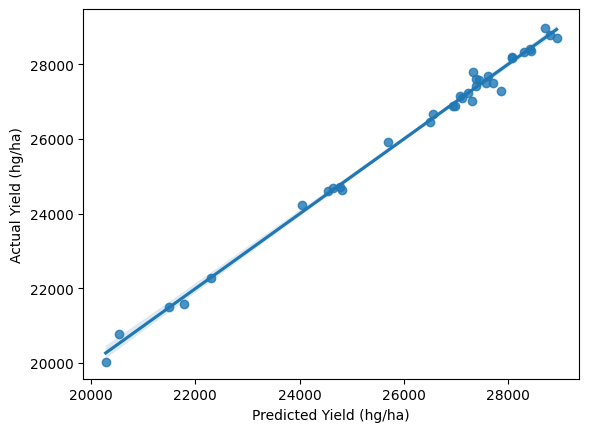

In [22]:
sns.regplot(x=y_pred_inv, y=y_true_inv)
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Actual Yield (hg/ha)')
plt.show()

In [23]:
#  Step 1: Prepare the last time_steps data points from your original dataset
# last_data_points = scaled_data[-time_steps:]
last_data_points = scaled_data
print(last_data_points.shape)
future_yields = []

# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# time_steps = 4 # Define the number of time steps in the sequence
# sequence_data = scaled_data
# X, y = create_sequences(scaled_data, time_steps)
print("X.shape",X.shape)
print("Y.shape",y.shape)

last_data_points = X[-1]
print("last_data_points Shape:",last_data_points.shape)
future_yields = []

def finalize_lstm(unitsconv=64, unitslstm=128, unitsdense=16 , activate='selu'):    
    model2 = Sequential()
    model2.add(LSTM(unitsconv, activation=activate, input_shape=X.shape[1:], return_sequences=True))
    model2.add(GRU(unitslstm, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    return model2

model = finalize_lstm()
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model8_weights.hdf5')
model.summary()



(42, 22)
X.shape (35, 5, 22)
Y.shape (35, 1)
last_data_points Shape: (5, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5, 64)             22272     
                                                                 
 gru_1 (GRU)                 (None, 128)               74496     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_______________________________________

In [24]:
# Step 3: Forecast the yield for the future without having future X values
num_future_steps = 5
time_steps = 5

for i in range(num_future_steps):
    # Reshape the last_data_points to match the model's input shape
    print("LastDataPoints Shape:",last_data_points.shape)
    df_X = last_data_points[-time_steps:]
#     print(df_X)
    print("DF Shape:",df_X.shape)
    X_pred = df_X.reshape(1, time_steps, df_X.shape[1])
    print("X_pred shape:",X_pred.shape)

    # Use the trained model to make a prediction
    predicted_yield1 = model.predict(X_pred)
    pred = predicted_yield1[0, 0]
    print("pred shape:",pred.shape)

    # Inverse transform the predicted yield to get the original scale and extract the scalar value
    predicted_yield = scaler_Y.inverse_transform(predicted_yield1)[0, 0]
    future_yields.append(predicted_yield)
#     print(predicted_yield)
    print("InvTrans Shape:",predicted_yield.shape)

    # Append the predicted yield to the last_data_points for the next prediction
    last_data_points = np.append(last_data_points, [np.concatenate(([pred], df_X[-1, 1:]))], axis=0)
#     print(last_data_points[-time_steps:])
    print("NP Concat shape:",np.concatenate(([pred], df_X[-1, 1:])).shape)
    print("LastDataPoints:",last_data_points[-time_steps:].shape)

# Step 4: Inverse transform the entire forecasted data to get the original scale
forecasted_yield = scaler.inverse_transform(last_data_points)

print(last_data_points.shape)

# The forecasted_yield will contain the predicted yield values for the future time steps
# print("Forecasted Yields: ",np.round(future_yields))

print(forecasted_yield[-num_future_steps:,0])

LastDataPoints Shape: (5, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 157ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (6, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 14ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (7, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 13ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (8, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (9, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape:

In [28]:
scaled_new_y = scaler_Y.inverse_transform(new_y)
scaled_new_y

array([[28367.],
       [28368.]])

In [29]:
print(X.shape)
pred = model.predict(X)
scaled_pred = y_pred_inv
y1 = y_true_inv
diff = y1 - scaled_pred
diff

(35, 5, 22)
2/2 [==============================] - 0s 2ms/step


array([[ 192.80859375],
       [-204.984375  ],
       [ 251.49609375],
       [-258.16992188],
       [  65.36328125],
       [ -14.80078125],
       [ 213.53125   ],
       [-174.84375   ],
       [  84.38867188],
       [ -46.34375   ],
       [ 213.47460938],
       [-568.05859375],
       [   8.00195312],
       [ -38.78515625],
       [ 460.60742188],
       [ -34.2890625 ],
       [ -78.44921875],
       [  10.75195312],
       [ 269.22265625],
       [-282.5859375 ],
       [ -96.42578125],
       [  68.14257812],
       [ 105.48242188],
       [  -4.15625   ],
       [-200.90625   ],
       [  51.80078125],
       [ -56.76757812],
       [ 167.47265625],
       [  77.6015625 ],
       [ 128.46875   ],
       [-214.97265625],
       [ 122.29296875],
       [ -62.34570312],
       [   3.77539062],
       [  13.16210938]])

[datetime.date(2019, 12, 31) datetime.date(2020, 12, 31)
 datetime.date(2021, 12, 31) datetime.date(2022, 12, 31)
 datetime.date(2023, 12, 31)]
[24040, 21776, 20529, 20282, 24631, 21504, 25698, 24803, 24535, 26940, 27384, 27863, 27102, 26489, 27329, 22307, 24781, 28792, 28702, 27307, 26971, 27077, 26561, 27228, 27704, 27381, 27571, 27428, 27600, 28076, 28924, 28062, 28425, 28412, 28307]


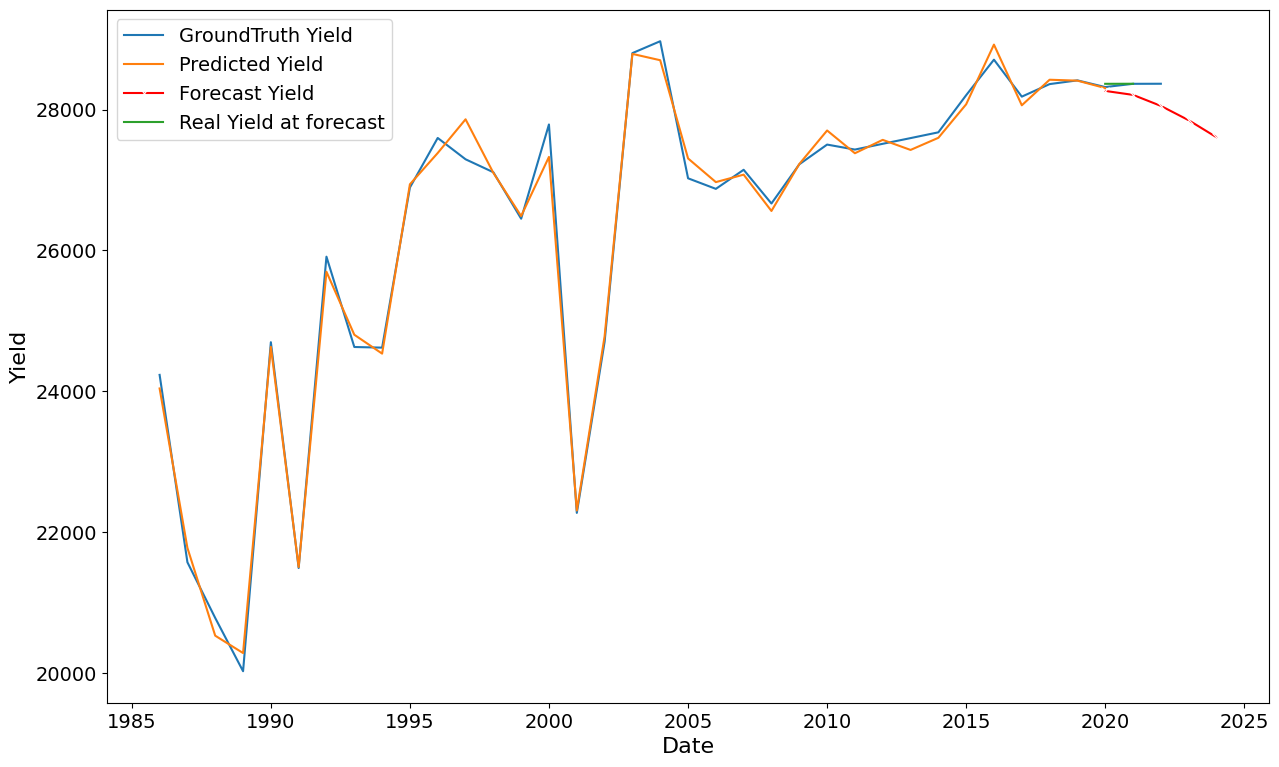

In [30]:
import matplotlib.pyplot as plt
date_range = pd.date_range(start='2019-12-31', periods=len(future_yields), freq='A-DEC')
date_range = date_range.date
print(date_range)

dataset = pd.read_csv("Monthly_dataset_1.csv")

new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

appended_data = pd.concat([existing_data,new_data], ignore_index=True)

date_known = pd.to_datetime(dataset['date'][time_steps:])
y_predict = [int(i) for i in scaled_pred]
print(y_predict)
y_known = dataset['Yield'][time_steps:]
date_forecast = pd.to_datetime(date_range)
y_forecast = future_yields
y_actual_forecast = [int(i) for i in scaled_new_y]


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.show()


plt.figure(figsize=(15, 9))
sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
sns.lineplot(x=date_known[:-2], y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x', color='red')  # Add markers to the Forecast line
sns.lineplot(x=date_forecast[:2], y=y_actual_forecast, label="Real Yield at forecast", markers='x--')
plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
# plt.show()
plt.savefig("Yield_Model5.png")

In [ ]:
from itertools import product

best_score = float('inf')
# # best_score = -9999
# best_hyperparameters = {}

# Step 3: Create a sequence of data by shifting the data by one time step.
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

def create_model_lstm(x, y, unitsconv, unitslstm, unitsdense , activate, optime, lr, loss, batch, epoch):    
    # Model 1 - 5
#     model = keras.models.Sequential()
#     model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
#    model.add(keras.layers.Dense(unitsdense,activation=activate))
#     model.add(keras.layers.Dense(1,activation='linear'))
#     model2 = model1(x , unitslstm, unitsdense, activate)
    
    # Model 6
    model2 = Sequential()
    model2.add(LSTM(unitslstm, activation=activate, input_shape=x.shape[1:], return_sequences=True))
    model2.add(GRU(unitsconv, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    print("\n\n")
    model2.summary()
    print("\n")    
    def r2_Keras(y_true, y_pred):
        SS_res =  K.sum(K.square( y_true-y_pred ))
        SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
        return ( 1 - SS_res/(SS_tot + K.epsilon()) )
    
    model2.compile(optimizer = optime(lr), loss=loss, metrics=[r2_Keras, 'mape'])    
    
    batch = int(batch)
    epoch = int(epoch)
    callback = ModelCheckpoint(filepath='Models/checkpoint/Model9_checkpoint.hdf5',
                              monitor='r2_Keras', mode='max', save_best_only=True, save_weights_only=True,
                              verbose=False)
    
    history = model2.fit(x, y,
                       batch_size = batch,
                       epochs = epoch,
                       verbose = 0,
                        callbacks=[callback],
                       shuffle = False)
    
    return model2, history

# Define hyperparameter search space
# models = [model1(), model2(), model3()]
timesteps = [4, 5] #TimeSteps for Data
unitsconv_list = [16, 32, 64]
unitslstm_list = [32, 64, 128] # Number of LSTM Units
unitsdense_list = [16, 32, 64] # Number of Dense units
activate_list = ['relu', 'selu'] # Activation Function
batch_size_list = [4, 8, 16] # Batch Size
learning_rate_list = [0.005, 0.001, 0.0005, 0.0001,] # Learning Rate
optimizer_list = [keras.optimizers.Adamax, keras.optimizers.Adam] # Optimizer 
loss_list = ['mse'] # Loss Function
epoch_list = [50, 100, 120]

Full_list = product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list)
print("Iterations :",len(list(Full_list)))
X_train, X_test, y_train, y_test = 0,0,0,0

# Iterate through all combinations of hyperparameters
for steps, convi, i, j, k, l, m, n, o, p in product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list):
    X, y = create_sequences(scaled_data, steps)
    X_train = X[:-9]
    y_train = y[:-9]
    X_test = X[-9:]
    y_test = y[-9:]
    
    print(steps, convi, i, j, k, l, m, n, o, p)
    model3, history = create_model_lstm(x=X_train, y=y_train, unitsconv=convi, unitslstm=i, unitsdense=j, activate=k, batch=l, lr=m, optime=n, loss=o, epoch=p)    
    
    
    
    model3.load_weights("Models/checkpoint/Model9_checkpoint.hdf5")
    y_pred1 = model3.predict(X_test)
    y_pred2 = scaler_Y.inverse_transform(y_pred1.reshape(-1, 1))
    y_true1 = y_test
    y_true2 = scaler_Y.inverse_transform(y_true1.reshape(-1, 1))
    score = mean_absolute_percentage_error(y_pred=y_pred2, y_true=y_true2)
    print("Fit Complete for:", steps, convi, i, j, k, l, m, n, o, p)
    print("\n\nCurrent Score:", score)
    
    # Update best hyperparameters if the current score is better
    if score < best_score:
        best_score = score
        best_hyperparameters = {"TimeSteps":steps, "unitsconv":convi, 'unitslstm': i, 'unitsdense': j, 'activate': k, 'batch': l, 'Optimizer': n, 'learning_rate': m, 'lossFunction': o, 'Epochs':p}
        print("\n\nNew Best Score:", score, "Hyperparameters:", (steps, convi, i, j, k, l, m, n, o, p))
        model3.save('Models/Model9.hdf5')
        model3.save_weights("Models/Model9_weights.hdf5")

print("\n\nBest Hyperparameters:", best_hyperparameters)
print("Best Score:", best_score)


    Best Hyperparameters: {'TimeSteps': 5,
    'unitslstm': 64,
    'unitsdense': 64,
    'activate': 'relu',
    'batch': 16,
    'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>,
    'learning_rate': 0.0005, 'lossFunction': 'mse', 'Epochs': 120}
    Best Score: 0.0053880662259232735
    
    
    New Best Score: 0.0049161988386506456 Hyperparameters: (4, 32, 32, 'selu', 8, 0.005, <class 'keras.optimizers.legacy.adam.Adam'>, 'mse', 50)
    32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100

In [16]:
X.shape

(37, 5, 22)

In [17]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

X,y = create_sequences(scaled_data, 4)
print("X.shape:",X.shape)
print("y.shape:",y.shape)
X_train = X[:-9]
y_train = y[:-9]
X_test = X[-9:]
y_test = y[-9:]

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=32, unitsdense=32, activate='selu')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()

X.shape: (38, 4, 22)
y.shape: (38, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7040      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X, y, batch_size=8, shuffle=False, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.0971 - mape: 7124902.5000
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0680 - mape: 12641807.0000
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0197 - mape: 4337588.0000
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0355 - mape: 9862698.0000
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0233 - mape: 4159080.5000
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0224 - mape: 3836522.5000
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0198 - mape: 4611708.5000
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0194 - mape: 2103233.5000
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0185 - mape: 5149697.0000
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0166 - mape: 3222185.7500
Epoch 11/50
5/5 [=

In [19]:
y_pred = model.predict(X[:], batch_size=8)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_pred_inv.shape

5/5 [==============================] - 0s 955us/step


(38, 1)

In [20]:
y_true = y[:]
y_true_inv = scaler_Y.inverse_transform(y_true)
y_true_inv.shape

(38, 1)

In [21]:
score = mean_absolute_percentage_error(y_pred=y_pred_inv,y_true=y_true_inv)
score

0.013458120672198811

In [22]:
score = r2_score(y_pred=y_pred_inv, y_true=y_true_inv)
score

0.968183062205816

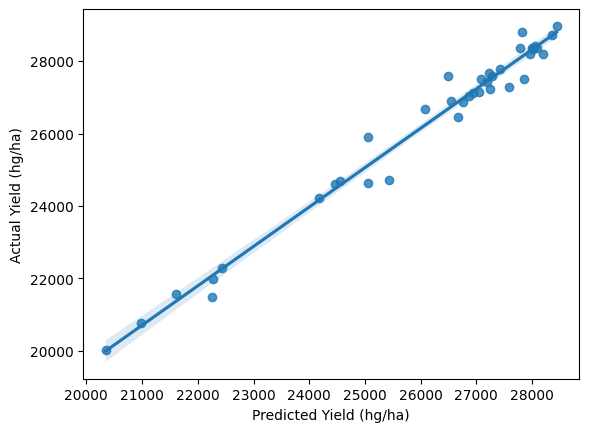

In [23]:
sns.regplot(x=y_pred_inv, y=y_true_inv)
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Actual Yield (hg/ha)')
plt.show()

In [24]:
# Difference :

diff = y_true_inv - y_pred_inv
diff

array([[-269.87695312],
       [  51.72070312],
       [ -30.45117188],
       [-198.69140625],
       [-323.08789062],
       [ 153.265625  ],
       [-767.00585938],
       [ 858.10742188],
       [-433.703125  ],
       [ 156.90429688],
       [ 348.0625    ],
       [1115.40820312],
       [-283.73632812],
       [ 175.015625  ],
       [-220.25390625],
       [ 367.70703125],
       [-166.68554688],
       [-731.828125  ],
       [ 991.20703125],
       [ 531.77734375],
       [ 154.46875   ],
       [ 123.02734375],
       [  94.61523438],
       [ 585.92773438],
       [ -28.1640625 ],
       [ 429.71289062],
       [ 244.41992188],
       [-336.85742188],
       [ 323.99414062],
       [ 454.39453125],
       [   2.65234375],
       [ 344.64648438],
       [ 225.8046875 ],
       [ 281.92773438],
       [ 367.53125   ],
       [ 299.97265625],
       [ 587.09375   ],
       [ 376.29296875]])

#### Future Forecast

In [25]:
#  Step 1: Prepare the last time_steps data points from your original dataset
# last_data_points = scaled_data[-time_steps:]
last_data_points = scaled_data
print(last_data_points.shape)
future_yields = []

# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# time_steps = 4 # Define the number of time steps in the sequence
# sequence_data = scaled_data
# X, y = create_sequences(scaled_data, time_steps)
print("X.shape",X.shape)
print("Y.shape",y.shape)

last_data_points = X[-1]
print("last_data_points Shape:",last_data_points.shape)
future_yields = []

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=32, unitsdense=32, activate='selu')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mape', r2_score])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()



(42, 22)
X.shape (38, 4, 22)
Y.shape (38, 1)
last_data_points Shape: (4, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                7040      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [26]:
# # Step 2: Create a variable to store the number of future time steps you want to forecast
# num_future_steps = 3  # Change this according to your needs

# # Forecast future yields iteratively
# for _ in range(num_future_steps):
#     # Reshape the current_data to match the input shape of the model
#     current_data = current_data.reshape(1, time_steps, -1)
    
#     # Predict the next yield using the model
#     predicted_yield = model.predict(current_data)
    
#     # Append the predicted yield to the future_yields list
#     future_yields.append(predicted_yield[0, 0])
    
#     # Update current_data by removing the first time step and appending the predicted yield
#     current_data = np.concatenate((current_data[:, 1:, :], predicted_yield), axis=1)

# print("Predicted Future Yields:", future_yields)

In [27]:
# Step 3: Forecast the yield for the future without having future X values
num_future_steps = 5
time_steps = 4

for i in range(num_future_steps):
    # Reshape the last_data_points to match the model's input shape
    print("LastDataPoints Shape:",last_data_points.shape)
    df_X = last_data_points[-time_steps:]
#     print(df_X)
    print("DF Shape:",df_X.shape)
    X_pred = df_X.reshape(1, time_steps, df_X.shape[1])
    print("X_pred shape:",X_pred.shape)

    # Use the trained model to make a prediction
    predicted_yield1 = model.predict(X_pred)
    pred = predicted_yield1[0, 0]
    print("pred shape:",pred.shape)

    # Inverse transform the predicted yield to get the original scale and extract the scalar value
    predicted_yield = scaler_Y.inverse_transform(predicted_yield1)[0, 0]
    future_yields.append(predicted_yield)
#     print(predicted_yield)
    print("InvTrans Shape:",predicted_yield.shape)

    # Append the predicted yield to the last_data_points for the next prediction
    last_data_points = np.append(last_data_points, [np.concatenate(([pred], df_X[-1, 1:]))], axis=0)
#     print(last_data_points[-time_steps:])
    print("NP Concat shape:",np.concatenate(([pred], df_X[-1, 1:])).shape)
    print("LastDataPoints:",last_data_points[-time_steps:].shape)

# Step 4: Inverse transform the entire forecasted data to get the original scale
forecasted_yield = scaler.inverse_transform(last_data_points)

print(last_data_points.shape)

# The forecasted_yield will contain the predicted yield values for the future time steps
# print("Forecasted Yields: ",np.round(future_yields))

print(forecasted_yield[-num_future_steps:,0])

LastDataPoints Shape: (4, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 92ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (5, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (6, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (7, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (8, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 11ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: 

In [28]:
print(X.shape)
pred = model.predict(X)
scaled_pred = y_pred_inv
y1 = y_true_inv
diff = y1 - scaled_pred
diff

(38, 4, 22)
2/2 [==============================] - 0s 2ms/step


array([[-269.87695312],
       [  51.72070312],
       [ -30.45117188],
       [-198.69140625],
       [-323.08789062],
       [ 153.265625  ],
       [-767.00585938],
       [ 858.10742188],
       [-433.703125  ],
       [ 156.90429688],
       [ 348.0625    ],
       [1115.40820312],
       [-283.73632812],
       [ 175.015625  ],
       [-220.25390625],
       [ 367.70703125],
       [-166.68554688],
       [-731.828125  ],
       [ 991.20703125],
       [ 531.77734375],
       [ 154.46875   ],
       [ 123.02734375],
       [  94.61523438],
       [ 585.92773438],
       [ -28.1640625 ],
       [ 429.71289062],
       [ 244.41992188],
       [-336.85742188],
       [ 323.99414062],
       [ 454.39453125],
       [   2.65234375],
       [ 344.64648438],
       [ 225.8046875 ],
       [ 281.92773438],
       [ 367.53125   ],
       [ 299.97265625],
       [ 587.09375   ],
       [ 376.29296875]])

In [29]:
# import matplotlib.pyplot as plt
# date_range = pd.date_range(start='2022-12-31', periods=len(future_yields), freq='A-DEC')
# date_range = date_range.date
# print(date_range)

# dataset = pd.read_csv("Monthly_dataset_1.csv")

# new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
# existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

# appended_data = pd.concat([existing_data,new_data], ignore_index=True)

# date_known = pd.to_datetime(dataset['date'])[5:]
# y_predict = [int(i) for i in scaled_pred]
# print(y_predict)
# # y_known = dataset['Yield'][time_steps:]

# y_known = [int(i) for i in y1]
# print(y_known)
# date_forecast = pd.to_datetime(date_range)
# y_forecast = forecasted_yield[-num_future_steps:, 0]


# # plt.figure(figsize=(15, 9))
# # sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# # sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# # plt.show()


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
# plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
# plt.xticks(fontsize=14)  # Increase x-axis tick label font size
# plt.yticks(fontsize=14)  # Increase y-axis tick label font size
# plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
# plt.show()

[datetime.date(2022, 12, 31) datetime.date(2023, 12, 31)
 datetime.date(2024, 12, 31) datetime.date(2025, 12, 31)
 datetime.date(2026, 12, 31)]
[22264, 24181, 21602, 20979, 20347, 24543, 22257, 25053, 25062, 24463, 26545, 26482, 27578, 26935, 26671, 27422, 22439, 25434, 27811, 28440, 26870, 26751, 27051, 26081, 27252, 27074, 27188, 27851, 27272, 27223, 28202, 28365, 27959, 28081, 28048, 28021, 27779, 27991]


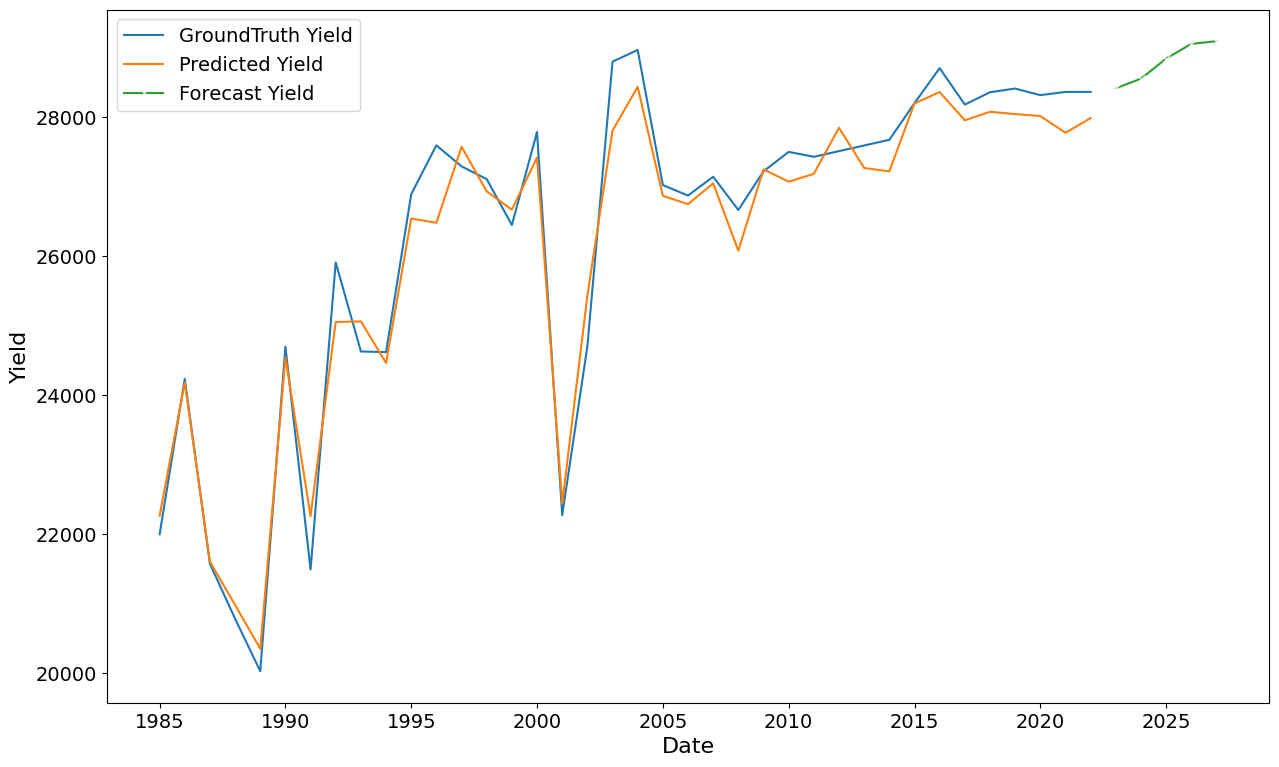

In [30]:
import matplotlib.pyplot as plt
date_range = pd.date_range(start='2022-12-31', periods=len(future_yields), freq='A-DEC')
date_range = date_range.date
print(date_range)

dataset = pd.read_csv("Monthly_dataset_1.csv")

new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

appended_data = pd.concat([existing_data,new_data], ignore_index=True)

date_known = pd.to_datetime(dataset['date'][time_steps:])
y_predict = [int(i) for i in scaled_pred]
print(y_predict)
y_known = dataset['Yield'][time_steps:]
date_forecast = pd.to_datetime(date_range)
y_forecast = future_yields


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.show()


plt.figure(figsize=(15, 9))
sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
plt.show()

In [43]:
model.save("Models/Final_model_overfit1.hdf5")
model.save_weights("Models/Final_modelWeights_overfit1.hdf5")

<Axes: xlabel='date', ylabel='Yield'>

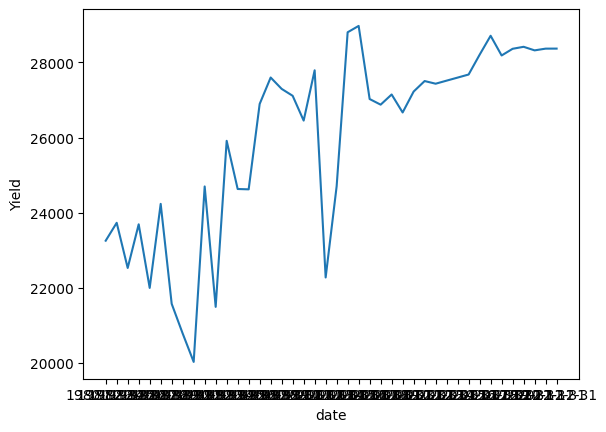

In [34]:
sns.lineplot(x=dataset['date'],y=dataset['Yield'])
sns.lineplot(x=dataset['date'])

In [45]:
y_pred_inv

array([[22264.877],
       [24181.28 ],
       [21602.451],
       [20979.691],
       [20347.088],
       [24543.734],
       [22257.006],
       [25053.893],
       [25062.703],
       [24463.096],
       [26545.938],
       [26482.592],
       [27578.736],
       [26935.984],
       [26671.254],
       [27422.293],
       [22439.686],
       [25434.828],
       [27811.793],
       [28440.223],
       [26870.531],
       [26751.973],
       [27051.385],
       [26081.072],
       [27252.164],
       [27074.287],
       [27188.58 ],
       [27851.857],
       [27272.006],
       [27223.605],
       [28202.348],
       [28365.354],
       [27959.195],
       [28081.072],
       [28048.469],
       [28021.027],
       [27779.906],
       [27991.707]], dtype=float32)

In [46]:
y_true_inv

array([[21995.],
       [24233.],
       [21572.],
       [20781.],
       [20024.],
       [24697.],
       [21490.],
       [25912.],
       [24629.],
       [24620.],
       [26894.],
       [27598.],
       [27295.],
       [27111.],
       [26451.],
       [27790.],
       [22273.],
       [24703.],
       [28803.],
       [28972.],
       [27025.],
       [26875.],
       [27146.],
       [26667.],
       [27224.],
       [27504.],
       [27433.],
       [27515.],
       [27596.],
       [27678.],
       [28205.],
       [28710.],
       [28185.],
       [28363.],
       [28416.],
       [28321.],
       [28367.],
       [28368.]])

In [47]:
date_known

4    1984-12-31
5    1985-12-31
6    1986-12-31
7    1987-12-31
8    1988-12-31
9    1989-12-31
10   1990-12-31
11   1991-12-31
12   1992-12-31
13   1993-12-31
14   1994-12-31
15   1995-12-31
16   1996-12-31
17   1997-12-31
18   1998-12-31
19   1999-12-31
20   2000-12-31
21   2001-12-31
22   2002-12-31
23   2003-12-31
24   2004-12-31
25   2005-12-31
26   2006-12-31
27   2007-12-31
28   2008-12-31
29   2009-12-31
30   2010-12-31
31   2011-12-31
32   2012-12-31
33   2013-12-31
34   2014-12-31
35   2015-12-31
36   2016-12-31
37   2017-12-31
38   2018-12-31
39   2019-12-31
40   2020-12-31
41   2021-12-31
Name: date, dtype: datetime64[ns]

In [51]:
datas = {'Date':list(date_known), 'Original Yield':list(y_true_inv[:,0]), 'Predicted Yield':list(y_pred_inv[:,0])}
dataframe = pd.DataFrame(datas)
dataframe

Date  Original Yield  Predicted Yield
0  1984-12-31         21995.0     22264.876953
1  1985-12-31         24233.0     24181.279297
2  1986-12-31         21572.0     21602.451172
3  1987-12-31         20781.0     20979.691406
4  1988-12-31         20024.0     20347.087891
5  1989-12-31         24697.0     24543.734375
6  1990-12-31         21490.0     22257.005859
7  1991-12-31         25912.0     25053.892578
8  1992-12-31         24629.0     25062.703125
9  1993-12-31         24620.0     24463.095703
10 1994-12-31         26894.0     26545.937500
11 1995-12-31         27598.0     26482.591797
12 1996-12-31         27295.0     27578.736328
13 1997-12-31         27111.0     26935.984375
14 1998-12-31         26451.0     26671.253906
15 1999-12-31         27790.0     27422.292969
16 2000-12-31         22273.0     22439.685547
17 2001-12-31         24703.0     25434.828125
18 2002-12-31         28803.0     27811.792969
19 2003-12-31         28972.0     28440.222656
20 2004-12-31         27025.0     26870.531250
21 2005-12-31         26875.0     26751.972656
22 2006-12-31         27146.0     27051.384766
23 2007-12-31         26667.0     26081.072266
24 2008-12-31         27224.0     27252.164062
25 2009-12-31         27504.0     27074.287109
26 2010-12-31         27433.0     27188.580078
27 2011-12-31         27515.0     27851.857422
28 2012-12-31         27596.0     27272.005859
29 2013-12-31         27678.0     27223.605469
30 2014-12-31         28205.0     28202.347656
31 2015-12-31         28710.0     28365.353516
32 2016-12-31         28185.0     27959.195312
33 2017-12-31         28363.0     28081.072266
34 2018-12-31         28416.0     28048.468750
35 2019-12-31         28321.0     28021.027344
36 2020-12-31         28367.0     27779.906250
37 2021-12-31         28368.0     27991.707031

In [60]:

# Save the DataFrame to an Excel file
output_file = 'yield_predictions.xlsx'  # Change this to your desired file name
df.to_excel(output_file, index=False)

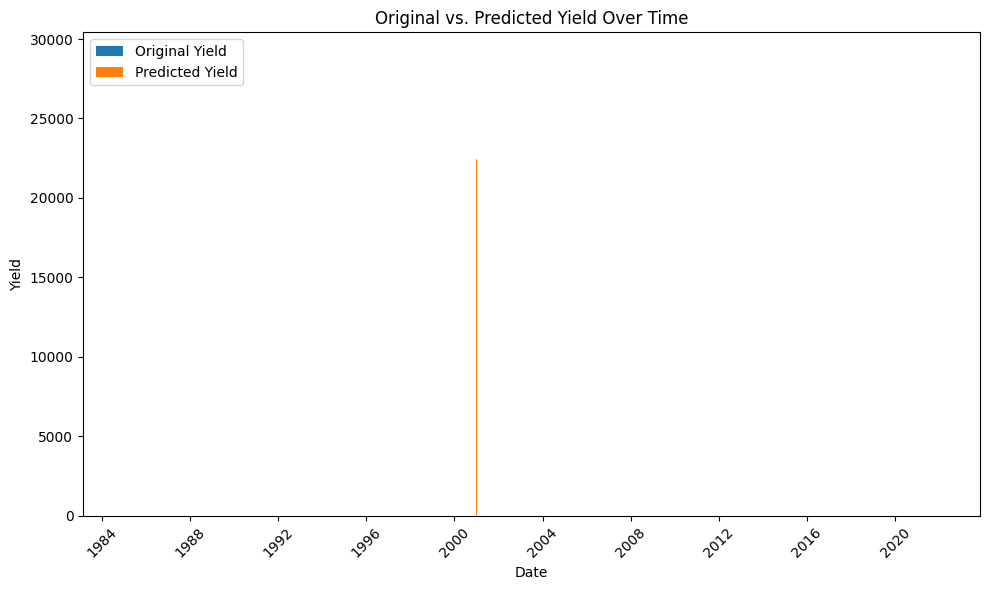

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Date': ['1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31'],
    'Original Yield': [21995.0, 24233.0, 21572.0, 20781.0, 20024.0, 24697.0, 21490.0, 25912.0, 24629.0, 24620.0, 26894.0, 27598.0, 27295.0, 27111.0, 26451.0, 27790.0, 22273.0, 24703.0, 28803.0, 28972.0, 27025.0, 26875.0, 27146.0, 26667.0, 27224.0, 27504.0, 27433.0, 27515.0, 27596.0, 27678.0, 28205.0, 28710.0, 28185.0, 28363.0, 28416.0, 28321.0, 28367.0, 28368.0],
    'Predicted Yield': [22264.876953, 24181.279297, 21602.451172, 20979.691406, 20347.087891, 24543.734375, 22257.005859, 25053.892578, 25062.703125, 24463.095703, 26545.937500, 26482.591797, 27578.736328, 26935.984375, 26671.253906, 27422.292969, 22439.685547, 25434.828125, 27811.792969, 28440.222656, 26870.531250, 26751.972656, 27051.384766, 26081.072266, 27252.164062, 27074.287109, 27188.580078, 27851.857422, 27272.005859, 27223.605469, 28202.347656, 28365.353516, 27959.195312, 28081.072266, 28048.468750, 28021.027344, 27779.906250, 27991.707031]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Original Yield'], width=0.4, label='Original Yield')
plt.bar(df['Date'], df['Predicted Yield'], width=0.4, label='Predicted Yield')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Original vs. Predicted Yield Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()